<a href="https://colab.research.google.com/github/kmukhs/AIB17_Section1_Project/blob/main/AIB17_Section1_Project1_%EA%B9%80%ED%98%84%EC%84%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/vgames2.csv')

In [2]:
# 의미없는 컬럼과 중복 데이터 제거

df = df.drop(labels=['Unnamed: 0'], axis=1)
df = df.drop_duplicates()

In [3]:
# 데이터 전처리를 위한 데이터프레임 copy

df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [4]:
# 연도에 결측치는 연도에 따른 인기를 분석하기 어렵고 대체하기가 어려우므로 삭제

Null_Year = df_clean[(df_clean['Year'].isnull())]
df_clean = df_clean.drop(index=Null_Year.index).reset_index(drop=True)

# Year의 데이터타입을 int로 변경

df_clean.Year = df_clean['Year'].astype('int')

# Year에 따라 분석하기 어려워 보이는 이상치를 탐색하여 추출

error_Year = df_clean.query("(Year >= 0) and (Year < 1950)")
error_Year
# error_Year['Year'].value_counts()

# 이상치를 수정하기로 함

error_Year1 = error_Year[(error_Year['Year'] > 50)]
error_Year2 = error_Year[(error_Year['Year'] < 21)]

error_Year1['Year'] = error_Year1['Year'] + 1900
error_Year2['Year'] = error_Year2['Year'] + 2000

df_clean = df_clean.drop(index=error_Year.index).reset_index(drop=True)
result_Year = pd.concat([error_Year1, error_Year2], axis=0)
df_clean = pd.concat([df_clean, result_Year], axis=0)
df_clean = df_clean.reset_index(drop=True)
df_clean;

<ipython-input-4-a4a744cc42ee>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_Year1['Year'] = error_Year1['Year'] + 1900
<ipython-input-4-a4a744cc42ee>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_Year2['Year'] = error_Year2['Year'] + 2000


In [5]:
# 장르의 결측치를 확인

error_Genre = df_clean[(df_clean['Genre'].isnull())]
error_Genre;

# 장르에 따른 인기를 분석하기 어렵고 대체하기가 어려우므로 삭제
 
df_clean = df_clean.drop(index=error_Genre.index).reset_index(drop=True)

# 퍼블리서의 결측치를 Other로 변경

df_clean['Publisher'] = df_clean['Publisher'].fillna('Other')

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [7]:
# 북미지역에서의 출고량이 object로 나오므로, 알파벳이 포함된 문자열을 탐색하여 처리

df_na_error = df_clean[(df_clean.NA_Sales.str.contains('[a-zA-Z]'))]
df_na_error;

df_clean = df_clean.drop(index=df_na_error.index).reset_index(drop=True)
df_clean = df_clean.astype({'NA_Sales':'float'})
df_clean['NA_Sales'] = (df_clean['NA_Sales'] * 1000000).astype(int)

df_na_error1 = df_na_error[(df_na_error.NA_Sales.str.contains('K'))]
df_na_error2 = df_na_error[(df_na_error.NA_Sales.str.contains('M'))]
df_na_error1['NA_Sales'] = (df_na_error1['NA_Sales'].str.extract('(\d+)').astype(int)) * 1000
df_na_error2['NA_Sales'] = (df_na_error2['NA_Sales'].str.replace('M','').astype(float)) * 1000000
df_na_error2 = df_na_error2.astype({'NA_Sales':'int'})

result_na = pd.concat([df_na_error1, df_na_error2], axis=0)
df_clean = pd.concat([df_clean, result_na], axis=0)
df_clean = df_clean.reset_index(drop=True)

# 유렵지역에서의 출고량이 object로 나오므로, 알파벳이 포함된 문자열을 탐색하여 처리

df_eu_error = df_clean[(df_clean.EU_Sales.str.contains('[a-zA-Z]'))]

df_clean = df_clean.drop(index=df_eu_error.index).reset_index(drop=True)
df_clean = df_clean.astype({'EU_Sales':'float'})
df_clean['EU_Sales'] = (df_clean['EU_Sales'] * 1000000).astype(int)

df_eu_error1 = df_eu_error[(df_eu_error.EU_Sales.str.contains('K'))]
df_eu_error2 = df_eu_error[(df_eu_error.EU_Sales.str.contains('M'))]
df_eu_error1['EU_Sales'] = (df_eu_error1['EU_Sales'].str.extract('(\d+)').astype(int)) * 1000
df_eu_error2['EU_Sales'] = (df_eu_error2['EU_Sales'].str.replace('M','').astype(float)) * 1000000
df_eu_error2 = df_eu_error2.astype({'EU_Sales':'int'})

result_eu = pd.concat([df_eu_error1, df_eu_error2], axis=0)
df_clean = pd.concat([df_clean, result_eu], axis=0)
df_clean = df_clean.reset_index(drop=True)

# 일본지역에서의 출고량이 object로 나오므로, 알파벳이 포함된 문자열을 탐색하여 처리

df_jp_error = df_clean[(df_clean.JP_Sales.str.contains('[a-zA-Z]'))]
df_clean = df_clean.drop(index=df_jp_error.index).reset_index(drop=True)

df_clean = df_clean.astype({'JP_Sales':'float'})
df_clean['JP_Sales'] = (df_clean['JP_Sales'] * 1000000).astype(int)

df_jp_error1 = df_jp_error[(df_jp_error.JP_Sales.str.contains('K'))]
df_jp_error2 = df_jp_error[(df_jp_error.JP_Sales.str.contains('M'))]
df_jp_error1['JP_Sales'] = (df_jp_error1['JP_Sales'].str.extract('(\d+)').astype(int)) * 1000
df_jp_error2['JP_Sales'] = (df_jp_error2['JP_Sales'].str.replace('M','').astype(float)) * 1000000
df_jp_error2 = df_jp_error2.astype({'JP_Sales':'int'})

result_jp = pd.concat([df_jp_error1, df_jp_error2], axis=0)
df_clean = pd.concat([df_clean, result_jp], axis=0)
df_clean = df_clean.reset_index(drop=True)

# 기타지역에서의 출고량이 object로 나오므로, 알파벳이 포함된 문자열을 탐색하여 처리

df_oh_error = df_clean[(df_clean.Other_Sales.str.contains('[a-zA-Z]'))]
df_clean = df_clean.drop(index=df_oh_error.index).reset_index(drop=True)

df_clean = df_clean.astype({'Other_Sales':'float'})
df_clean['Other_Sales'] = (df_clean['Other_Sales'] * 1000000).astype(int)

df_oh_error1 = df_oh_error[(df_oh_error.Other_Sales.str.contains('K'))]
df_oh_error2 = df_oh_error[(df_oh_error.Other_Sales.str.contains('M'))]
df_oh_error1['Other_Sales'] = (df_oh_error1['Other_Sales'].str.extract('(\d+)').astype(int)) * 1000
df_oh_error2['Other_Sales'] = (df_oh_error2['Other_Sales'].str.replace('M','').astype(float)) * 1000000
df_oh_error2 = df_oh_error2.astype({'Other_Sales':'int'})

result_oh = pd.concat([df_oh_error1, df_oh_error2], axis=0)
df_clean = pd.concat([df_clean, result_oh], axis=0)
df_clean = df_clean.reset_index(drop=True)

# 전처리가 잘 되었는지 확인

df_clean

<ipython-input-7-6c6526053cf3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_error1['NA_Sales'] = (df_na_error1['NA_Sales'].str.extract('(\d+)').astype(int)) * 1000
<ipython-input-7-6c6526053cf3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_error2['NA_Sales'] = (df_na_error2['NA_Sales'].str.replace('M','').astype(float)) * 1000000
<ipython-input-7-6c6526053cf3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16272,World Championship Poker: Featuring Howard Led...,PS2,2006,Misc,Oxygen Interactive,820000,640000,0,220000
16273,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006,Misc,Konami Digital Entertainment,140000,50000,70000,10000
16274,PBR: Out of the Chute,Wii,2008,Sports,Crave Entertainment,120000,0,0,10000
16275,1 vs. 100,DS,2008,Misc,DSI Games,80000,0,0,10000


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  int64 
 6   EU_Sales     16277 non-null  int64 
 7   JP_Sales     16277 non-null  int64 
 8   Other_Sales  16277 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


In [9]:
# 이름순으로 정렬

df_clean = df_clean.sort_values(by = df_clean.columns[0]).reset_index(drop=True)

# 출고량의 값들을 모두 더한 새로운 칼럼 생성

df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] +	df_clean['JP_Sales'] + df_clean['Other_Sales']

# 데이터의 전반적 전처리 완료

df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,150000,100000,120000,30000,400000
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0,0,170000,0,170000
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,110000,90000,0,30000,230000
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0,0,160000,0,160000
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0,0,170000,0,170000


In [10]:
# 지역에 따른 선호도가 정확하게 다른지 파악하기 위하여, 카이제곱검정을 실시함
# P-value가 0.05보다 낮으므로 대립가설(지역별 장르 선호도가 다르다)을 채택

import scipy.stats as stats

obs1 = df_clean.groupby('Genre').sum().iloc[: , 1:-1]
result1 = stats.chi2_contingency(obs1, correction=False)

result1[1]

0.0

In [11]:
df_melt = df_clean.copy()

In [12]:
# 지역별 장르 선호도를 추출하기 위하여 출고량을 Melt를 실행하여 정리함

df_melt = pd.melt(df_melt, id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher' ,'Total_Sales'] ,value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Region_Sales')
df_melt = df_melt.sort_values(['Name','Region']).reset_index(drop=True)
df_melt

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,400000,EU_Sales,100000
1,'98 Koshien,PS,1998,Sports,Magical Company,400000,JP_Sales,120000
2,'98 Koshien,PS,1998,Sports,Magical Company,400000,NA_Sales,150000
3,'98 Koshien,PS,1998,Sports,Magical Company,400000,Other_Sales,30000
4,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,170000,EU_Sales,0
...,...,...,...,...,...,...,...,...
65103,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,20000,Other_Sales,0
65104,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,EU_Sales,0
65105,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,JP_Sales,140000
65106,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,NA_Sales,0


In [13]:
# 지역별로 나누어 분석 시작

RegNA = df_melt[(df_melt['Region'] == 'NA_Sales')].sort_values('Name').reset_index(drop=True)
RegEU = df_melt[(df_melt['Region'] == 'EU_Sales')].sort_values('Name').reset_index(drop=True)
RegJP = df_melt[(df_melt['Region'] == 'JP_Sales')].sort_values('Name').reset_index(drop=True)
RegOther = df_melt[(df_melt['Region'] == 'Other_Sales')].reset_index(drop=True).sort_values('Name').reset_index(drop=True)

In [14]:
# 전 지역 장르별 총 출고수 및 비율, 순위 칼럼 추가

RegNAGen = RegNA.groupby('Genre')['Region_Sales'].sum()
RegNAGen = pd.DataFrame(RegNAGen) 
RegNAGen['Ratio'] = RegNAGen['Region_Sales'] / RegNAGen['Region_Sales'].sum()
RegNAGen['Rank'] =  RegNAGen['Region_Sales'].rank(method='max', ascending=False)
RegNAGen = RegNAGen.sort_values('Rank').reset_index(drop=False)

RegEUGen = RegEU.groupby('Genre')['Region_Sales'].sum()
RegEUGen = pd.DataFrame(RegEUGen) 
RegEUGen['Ratio'] = RegEUGen['Region_Sales'] / RegEUGen['Region_Sales'].sum()
RegEUGen['Rank'] =  RegEUGen['Region_Sales'].rank(method='max', ascending=False)
RegEUGen = RegEUGen.sort_values('Rank').reset_index(drop=False)

RegJPGen = RegJP.groupby('Genre')['Region_Sales'].sum()
RegJPGen = pd.DataFrame(RegJPGen) 
RegJPGen['Ratio'] = RegJPGen['Region_Sales'] / RegJPGen['Region_Sales'].sum()
RegJPGen['Rank'] =  RegJPGen['Region_Sales'].rank(method='max', ascending=False)
RegJPGen = RegJPGen.sort_values('Rank').reset_index(drop=False)

RegOTHERGen = RegOther.groupby('Genre')['Region_Sales'].sum()
RegOTHERGen = pd.DataFrame(RegOTHERGen) 
RegOTHERGen['Ratio'] = RegOTHERGen['Region_Sales'] / RegOTHERGen['Region_Sales'].sum()
RegOTHERGen['Rank'] =  RegOTHERGen['Region_Sales'].rank(method='max', ascending=False)
RegOTHERGen = RegOTHERGen.sort_values('Rank').reset_index(drop=False)

In [15]:
RegNAGen

,Genre,Region_Sales,Ratio,Rank
0,Action,858779997,0.199123,1.0
1,Sports,667259996,0.154715,2.0
2,Shooter,574479997,0.133203,3.0
3,Platform,445379999,0.103269,4.0
4,Misc,400289999,0.092814,5.0
5,Racing,354699997,0.082243,6.0
6,Role-Playing,318759999,0.073910,7.0
7,Fighting,220349998,0.051092,8.0
8,Simulation,181429998,0.042068,9.0
9,Puzzle,121579999,0.028190,10.0


In [16]:
RegEUGen

,Genre,Region_Sales,Ratio,Rank
0,Action,513639997,0.214374,1.0
1,Sports,370969999,0.154829,2.0
2,Shooter,310229996,0.129478,3.0
3,Racing,235029999,0.098093,4.0
4,Misc,210200000,0.087730,5.0
5,Platform,200649999,0.083744,6.0
6,Role-Playing,183099998,0.076419,7.0
7,Simulation,113170000,0.047233,8.0
8,Fighting,99900000,0.041694,9.0
9,Adventure,63710000,0.026590,10.0


In [17]:
RegJPGen

,Genre,Region_Sales,Ratio,Rank
0,Role-Playing,342929999,0.269722,1.0
1,Action,156610000,0.123177,2.0
2,Sports,134759999,0.105992,3.0
3,Platform,130529999,0.102665,4.0
4,Misc,104180000,0.081940,5.0
5,Fighting,87140000,0.068538,6.0
6,Simulation,63540000,0.049976,7.0
7,Racing,56320000,0.044297,8.0
8,Puzzle,56240000,0.044234,9.0
9,Adventure,51890000,0.040813,10.0


In [18]:
RegOTHERGen

,Genre,Region_Sales,Ratio,Rank
0,Action,183989998,0.234840,1.0
1,Sports,132349999,0.168928,2.0
2,Shooter,101860000,0.130011,3.0
3,Racing,76510000,0.097655,4.0
4,Misc,72739999,0.092843,5.0
5,Role-Playing,56730000,0.072409,6.0
6,Platform,51450000,0.065669,7.0
7,Fighting,36150000,0.046141,8.0
8,Simulation,31320000,0.039976,9.0
9,Adventure,16700000,0.021315,10.0


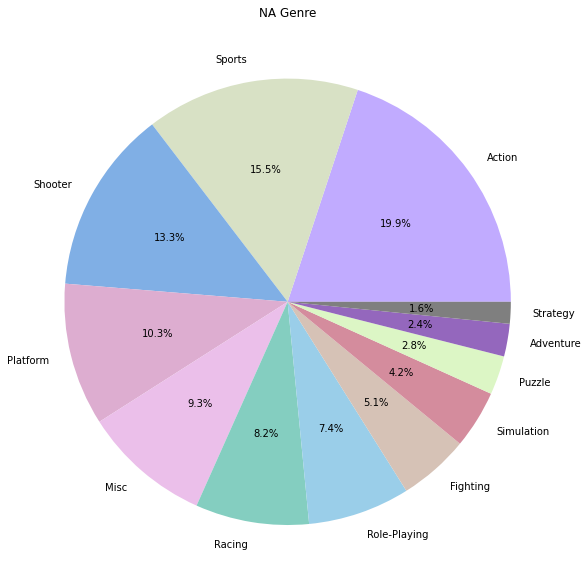

In [19]:
# 북미지역 장르 선호도

import matplotlib.pyplot as plt

labels = RegNAGen['Genre']
ratio = RegNAGen['Ratio']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,20))
plt.pie(ratio, labels = labels , autopct = '%1.1f%%', colors = colors)
plt.title('NA Genre');

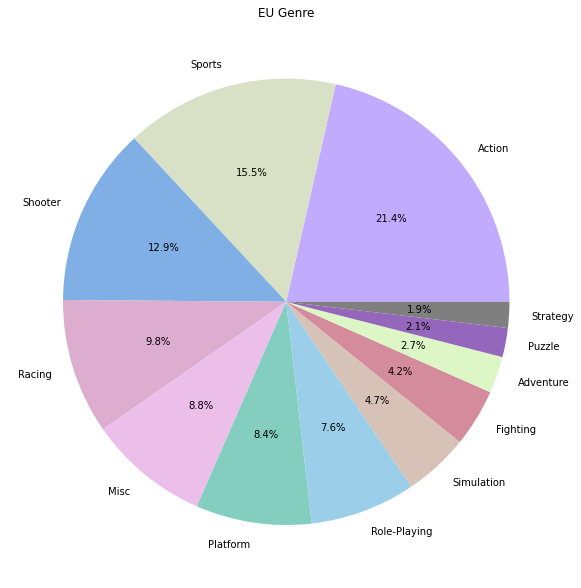

In [20]:
# 유럽지역 장르 선호도

import matplotlib.pyplot as plt

labels = RegEUGen['Genre']
ratio = RegEUGen['Ratio']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,20))
plt.pie(ratio , labels = labels, autopct = '%1.1f%%', colors = colors)
plt.title('EU Genre');

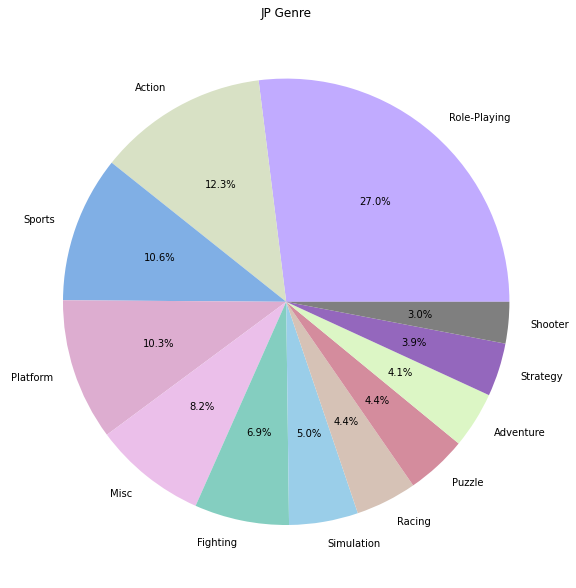

In [21]:
# 일본지역 장르 선호도

import matplotlib.pyplot as plt

labels = RegJPGen['Genre']
ratio = RegJPGen['Ratio']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,20))
plt.pie(ratio , labels = labels, autopct = '%1.1f%%', colors = colors)
plt.title('JP Genre');

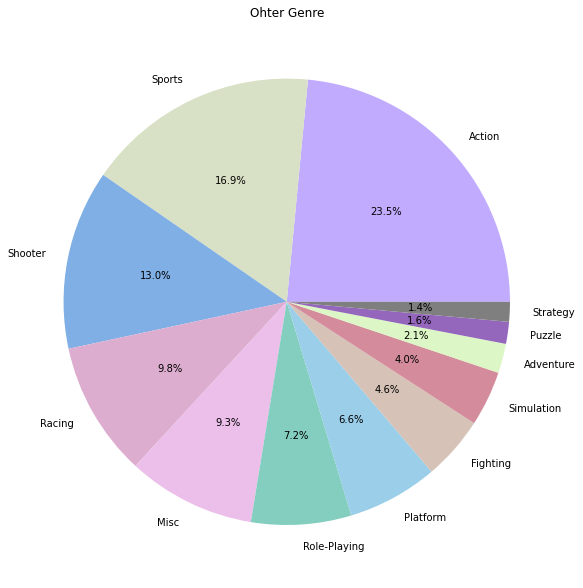

In [22]:
# 기타지역 장르 선호도

import matplotlib.pyplot as plt

labels = RegOTHERGen['Genre']
ratio = RegOTHERGen['Ratio']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,20))
plt.pie(ratio , labels = labels, autopct = '%1.1f%%', colors = colors)
plt.title('Ohter Genre');

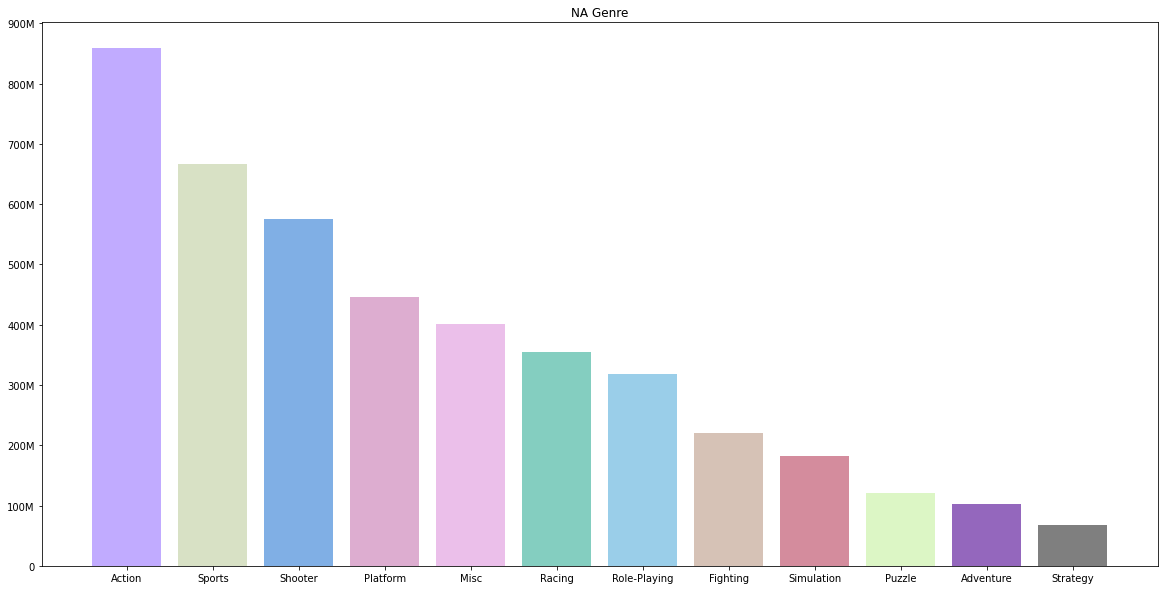

In [23]:
# 북미지역 장르별 총 판매량

labels = RegNAGen['Genre']
ratio = RegNAGen['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(20,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 100000000 , 200000000 , 300000000 , 400000000 , 500000000 , 600000000 , 700000000 , 800000000 , 900000000], ('0' , '100M' , '200M' , '300M'  , '400M' , '500M' , '600M' , '700M' , '800M' , '900M'))
plt.title("NA Genre")

plt.show()

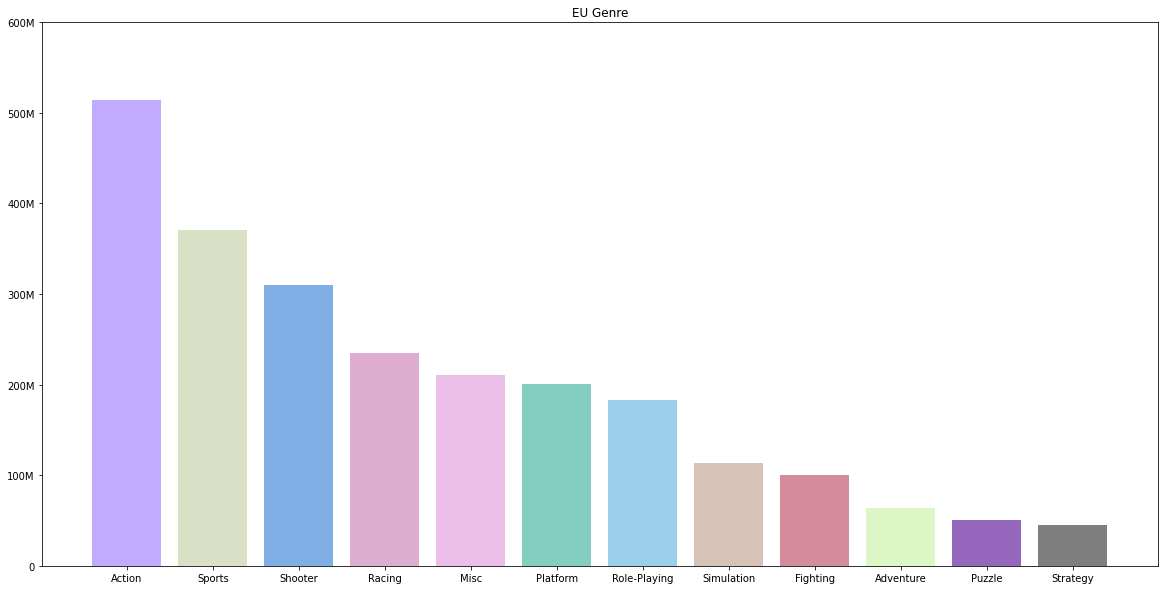

In [24]:
# 유럽지역 장르별 총 판매량

labels = RegEUGen['Genre']
ratio = RegEUGen['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(20,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 100000000 , 200000000 , 300000000 , 400000000 , 500000000 , 600000000], ('0' , '100M' , '200M' , '300M'  , '400M' , '500M' , '600M'))
plt.title("EU Genre")

plt.show()

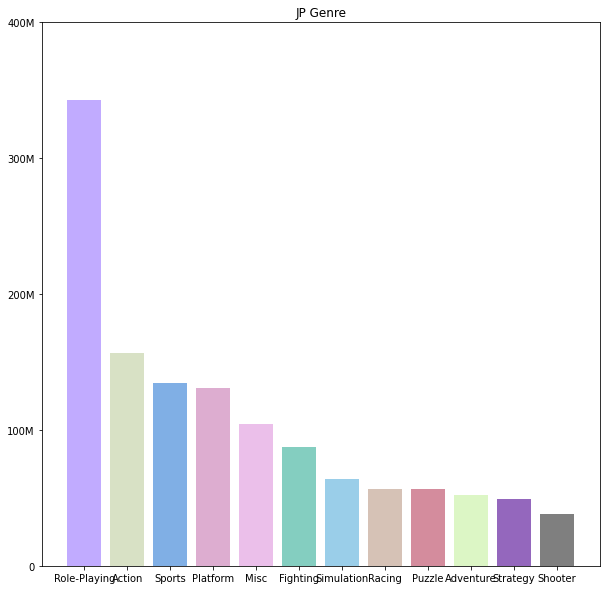

In [25]:
# 일본지역 장르별 총 판매량

labels = RegJPGen['Genre']
ratio = RegJPGen['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 100000000 , 200000000 , 300000000 , 400000000], ('0' , '100M' , '200M' , '300M'  , '400M'))
plt.title("JP Genre")

plt.show()

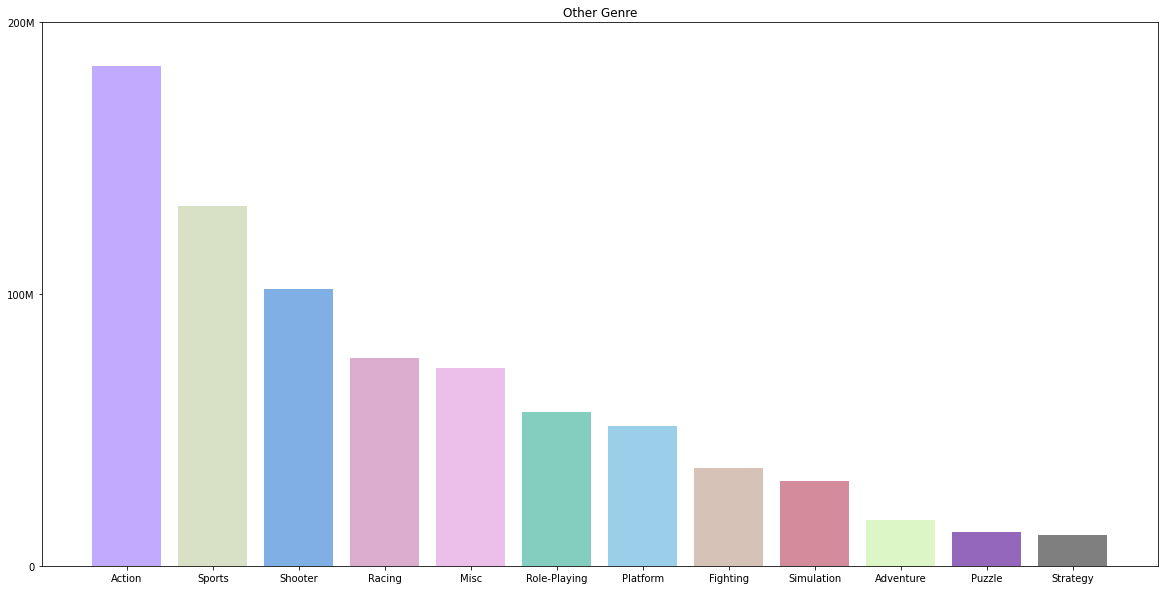

In [26]:
# 기타지역 장르별 총 판매량

labels = RegOTHERGen['Genre']
ratio = RegOTHERGen['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(20,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 100000000 , 200000000], ('0' , '100M' , '200M'))
plt.title("Other Genre")

plt.show()

In [27]:
# 연도별에 따른 트렌드가 정확하게 다른지 파악하기 위하여, 카이제곱검정을 실시함
# P-value가 0.05보다 낮으므로 대립가설(연도별로 트렌드(장르별 선호도)가 다르다)을 채택

obs2 = df_clean.groupby(['Year', 'Genre']).sum().iloc[:,-1].unstack().fillna(0)
result2 = stats.chi2_contingency(obs2, correction=False)

result2[1]

0.0

In [28]:
df_tren = df_clean.copy()

In [29]:
# 트렌드 변화를 Line Graph로 대략적 파악
# 판매량이 10M 이상인 것만 나타나도록 함

Tren = df_tren.groupby(['Year','Genre'])['Total_Sales'].sum().unstack().fillna(0)
Tren;

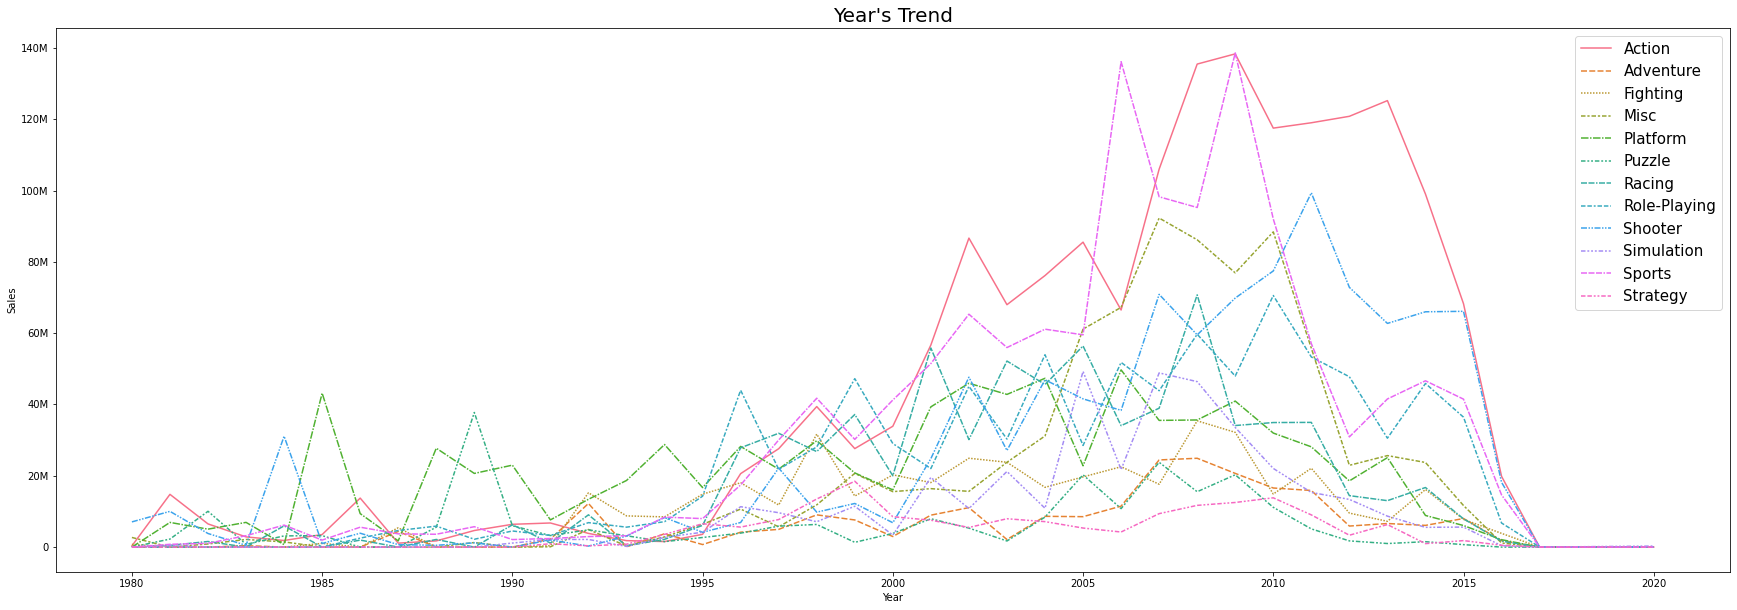

In [30]:
# 간단하게 분석하여 나타낼 수 있긴 하나, 좀 더 정확히 알아보기 위하여 시대를 나누어 알아보도록 함

import seaborn as sns

fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = Tren)
plt.title("Year's Trend", fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.yticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000 , 120000000 , 140000000], ('0' , '20M' , '40M' , '60M' , '80M' , '100M' , '120M' , '140M'))
plt.legend(loc='upper right', fontsize = 15)
plt.show()

In [31]:
# 연도별 트렌드 분석을 위하여 시대를 나누어 줌

YearTren80 = df_tren.query("(Year >= 1980) and (Year < 1990)").reset_index(drop=True)
YearTren90 = df_tren.query("(Year >= 1990) and (Year < 2000)").reset_index(drop=True)
YearTren00 = df_tren.query("(Year >= 2000) and (Year < 2010)").reset_index(drop=True)
YearTren10 = df_tren.query("(Year >= 2010) and (Year < 2021)").reset_index(drop=True)

In [32]:
YearTren80 = YearTren80.groupby('Genre')['Total_Sales'].sum()
YearTren80 = pd.DataFrame(YearTren80)
YearTren80['Rank'] =  YearTren80['Total_Sales'].rank(method='max', ascending=False)
YearTren80 = YearTren80.sort_values('Rank').reset_index(drop=False)

YearTren90 = YearTren90.groupby('Genre')['Total_Sales'].sum()
YearTren90 = pd.DataFrame(YearTren90)
YearTren90['Rank'] =  YearTren90['Total_Sales'].rank(method='max', ascending=False)
YearTren90 = YearTren90.sort_values('Rank').reset_index(drop=False)

YearTren00 = YearTren00.groupby('Genre')['Total_Sales'].sum()
YearTren00 = pd.DataFrame(YearTren00)
YearTren00['Rank'] =  YearTren00['Total_Sales'].rank(method='max', ascending=False)
YearTren00 = YearTren00.sort_values('Rank').reset_index(drop=False)

YearTren10 = YearTren10.groupby('Genre')['Total_Sales'].sum()
YearTren10 = pd.DataFrame(YearTren10)
YearTren10['Rank'] =  YearTren10['Total_Sales'].rank(method='max', ascending=False)
YearTren10 = YearTren10.sort_values('Rank').reset_index(drop=False)

In [33]:
YearTren80;

In [34]:
YearTren90;

In [35]:
YearTren00;

In [36]:
YearTren10;

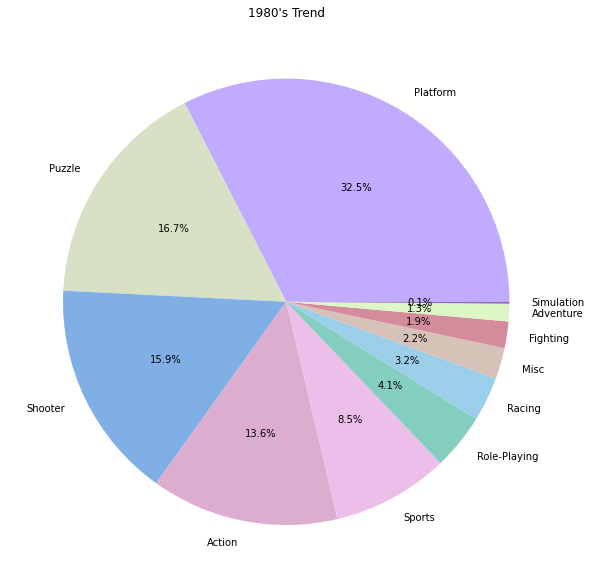

In [37]:
# 1980년대 장르 선호도

import matplotlib.pyplot as plt

labels = YearTren80['Genre']
ratio = YearTren80['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,20))
plt.pie(ratio , labels = labels, autopct = '%1.1f%%', colors = colors)
plt.title("1980's Trend");

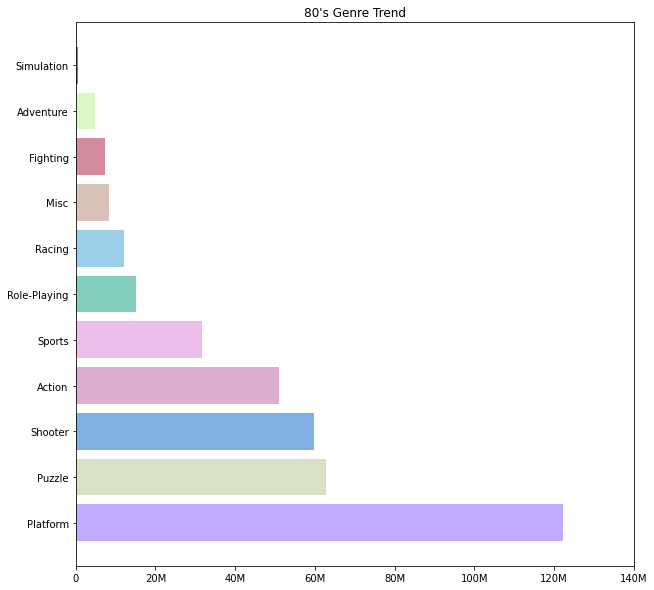

In [38]:
# 80년대 장르별 총 판매량 (트렌드)

labels = YearTren80['Genre']
ratio = YearTren80['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000 , 120000000 , 140000000], ('0' , '20M' , '40M' , '60M'  , '80M' , '100M' , '120M' , '140M'))
plt.title("80's Genre Trend");

plt.show()

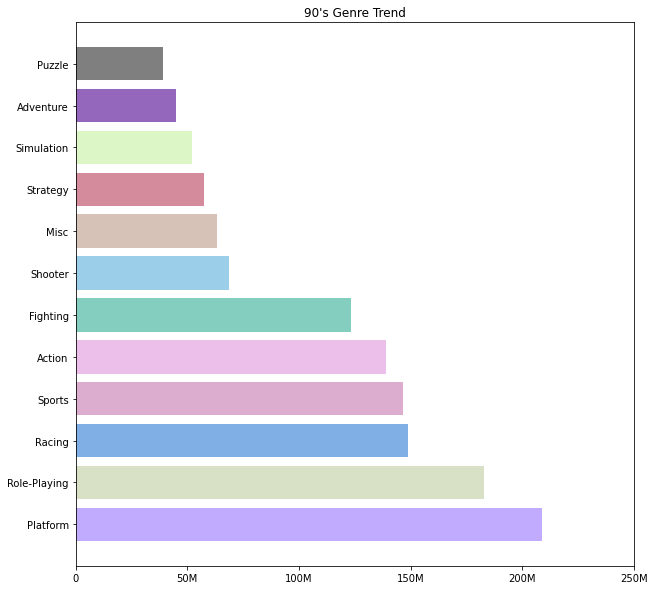

In [39]:
# 90년대 장르별 총 판매량

labels = YearTren90['Genre']
ratio = YearTren90['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000], ('0' , '50M' , '100M' , '150M'  , '200M' , '250M'))
plt.title("90's Genre Trend");

plt.show()

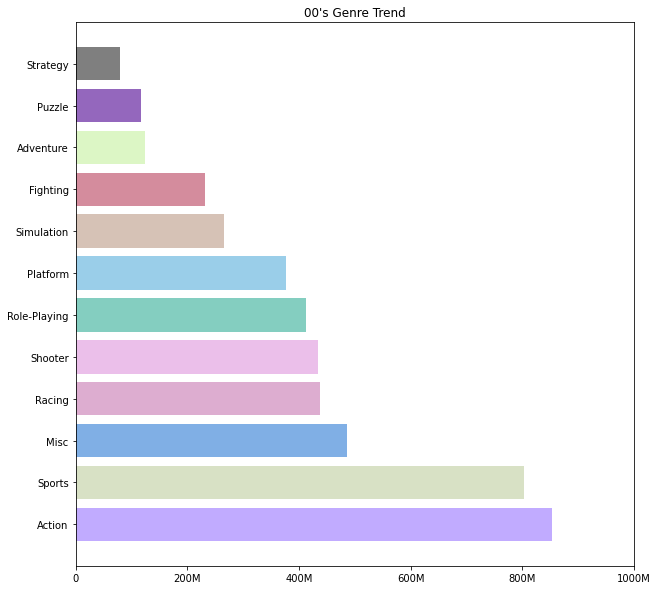

In [40]:
# 00년대 장르별 총 판매량

labels = YearTren00['Genre']
ratio = YearTren00['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 200000000 , 400000000 , 600000000 , 800000000 , 1000000000], ('0' , '200M' , '400M' , '600M'  , '800M' , '1000M'))
plt.title("00's Genre Trend");

plt.show()

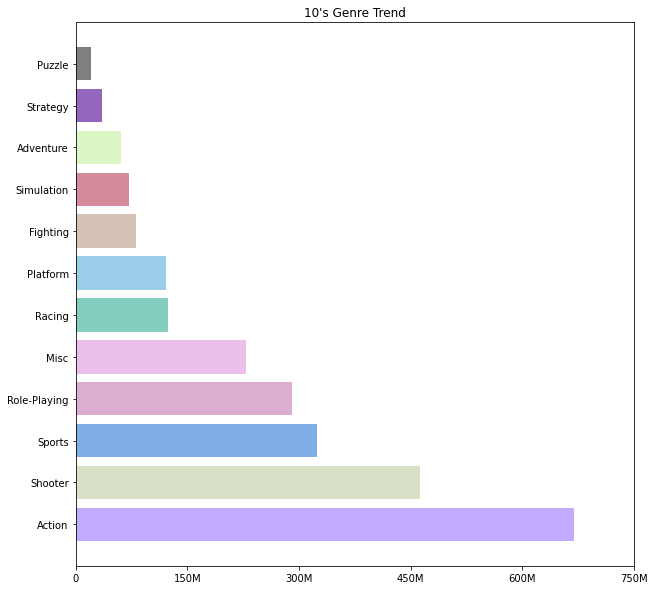

In [41]:
# 10년대 장르별 총 판매량

labels = YearTren10['Genre']
ratio = YearTren10['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 150000000 , 300000000 , 450000000 , 600000000 , 750000000], ('0' , '150M' , '300M' , '450M'  , '600M' , '750M'))
plt.title("10's Genre Trend");

plt.show()

In [42]:
# melt를 사용하여 지역별 출고량 분리

reg_tren = pd.melt(df_tren, id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher' ,'Total_Sales'] ,value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Region_Sales')
reg_tren = reg_tren.sort_values(['Name','Region']).reset_index(drop=True)
reg_tren

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,400000,EU_Sales,100000
1,'98 Koshien,PS,1998,Sports,Magical Company,400000,JP_Sales,120000
2,'98 Koshien,PS,1998,Sports,Magical Company,400000,NA_Sales,150000
3,'98 Koshien,PS,1998,Sports,Magical Company,400000,Other_Sales,30000
4,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,170000,EU_Sales,0
...,...,...,...,...,...,...,...,...
65103,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,20000,Other_Sales,0
65104,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,EU_Sales,0
65105,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,JP_Sales,140000
65106,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,140000,NA_Sales,0


In [43]:
# 지역별로 나누어 분석 시작

trenNA = reg_tren[(reg_tren['Region'] == 'NA_Sales')].sort_values('Name').reset_index(drop=True)
trenEU = reg_tren[(reg_tren['Region'] == 'EU_Sales')].sort_values('Name').reset_index(drop=True)
trenJP = reg_tren[(reg_tren['Region'] == 'JP_Sales')].sort_values('Name').reset_index(drop=True)
trenOther = reg_tren[(reg_tren['Region'] == 'Other_Sales')].reset_index(drop=True).sort_values('Name').reset_index(drop=True)

In [44]:
YearTren80NA = trenNA.query("(Year >= 1980) and (Year < 1990)").reset_index(drop=True)
YearTren90NA = trenNA.query("(Year >= 1990) and (Year < 2000)").reset_index(drop=True)
YearTren00NA = trenNA.query("(Year >= 2000) and (Year < 2010)").reset_index(drop=True)
YearTren10NA = trenNA.query("(Year >= 2010) and (Year < 2021)").reset_index(drop=True)

YearTren80NA = YearTren80NA.groupby('Genre')['Region_Sales'].sum()
YearTren80NA = pd.DataFrame(YearTren80NA)
YearTren80NA['Rank'] =  YearTren80NA['Region_Sales'].rank(method='max', ascending=False)
YearTren80NA = YearTren80NA.sort_values('Rank').reset_index(drop=False)

YearTren90NA = YearTren90NA.groupby('Genre')['Region_Sales'].sum()
YearTren90NA = pd.DataFrame(YearTren90NA)
YearTren90NA['Rank'] =  YearTren90NA['Region_Sales'].rank(method='max', ascending=False)
YearTren90NA = YearTren90NA.sort_values('Rank').reset_index(drop=False)

YearTren00NA = YearTren00NA.groupby('Genre')['Region_Sales'].sum()
YearTren00NA = pd.DataFrame(YearTren00NA)
YearTren00NA['Rank'] =  YearTren00NA['Region_Sales'].rank(method='max', ascending=False)
YearTren00NA = YearTren00NA.sort_values('Rank').reset_index(drop=False)

YearTren10NA = YearTren10NA.groupby('Genre')['Region_Sales'].sum()
YearTren10NA = pd.DataFrame(YearTren10NA)
YearTren10NA['Rank'] =  YearTren10NA['Region_Sales'].rank(method='max', ascending=False)
YearTren10NA = YearTren10NA.sort_values('Rank').reset_index(drop=False)

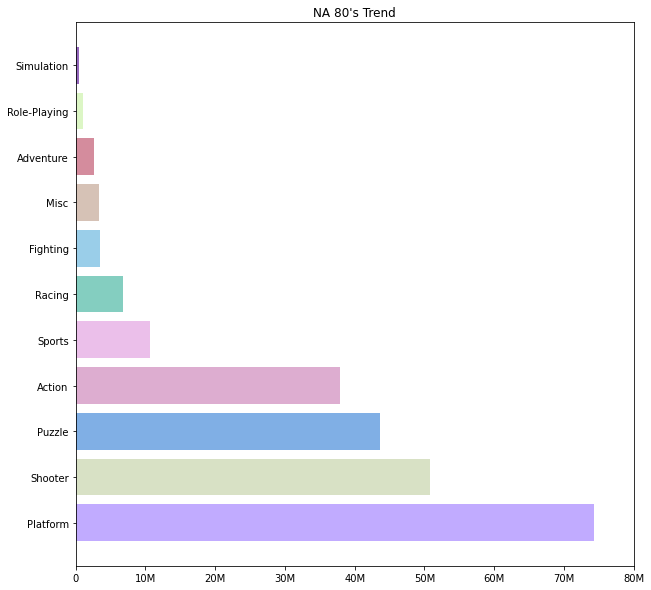

In [45]:
# 80년대 장르별 총 판매량(북미) - 트렌드

labels = YearTren80NA['Genre']
ratio = YearTren80NA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000 , 60000000 , 70000000 , 80000000], ('0' , '10M' , '20M' , '30M'  , '40M' , '50M' , '60M' , '70M' , '80M'))
plt.title("NA 80's Trend");
plt.show()

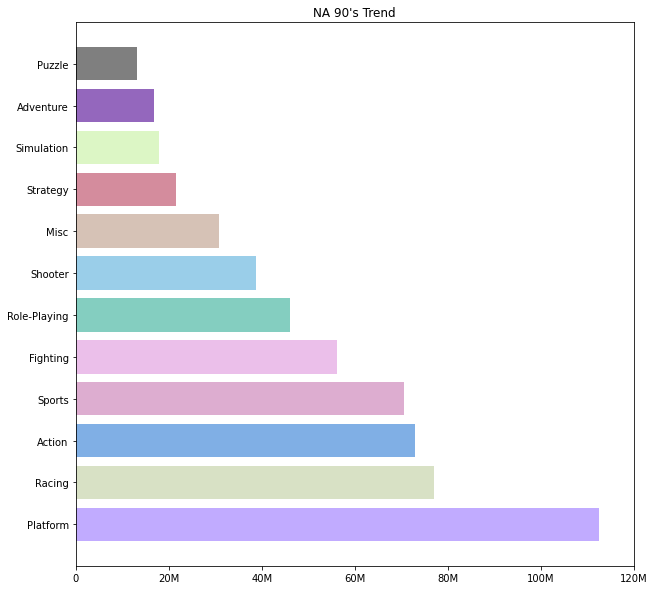

In [46]:
# 90년대 장르별 총 판매량(북미) - 트렌드

labels = YearTren90NA['Genre']
ratio = YearTren90NA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000 , 120000000], ('0' , '20M' , '40M' , '60M'  , '80M' , '100M' , '120M'))
plt.title("NA 90's Trend");

plt.show()

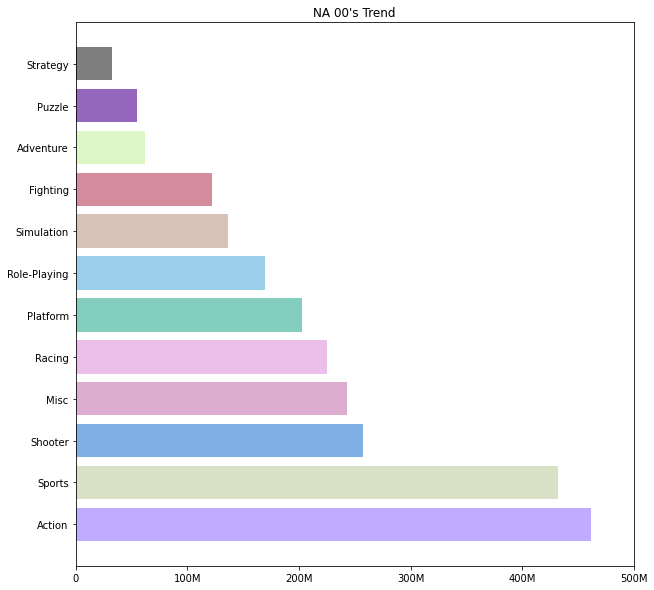

In [47]:
# 00년대 장르별 총 판매량(북미) - 트렌드

labels = YearTren00NA['Genre']
ratio = YearTren00NA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 100000000 , 200000000 , 300000000 , 400000000 , 500000000], ('0' , '100M' , '200M' , '300M'  , '400M' , '500M'))
plt.title("NA 00's Trend");

plt.show()

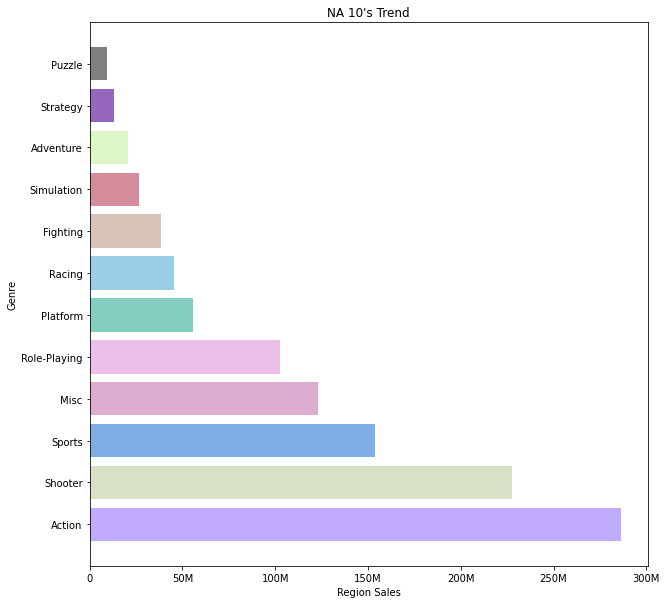

In [48]:
# 10년대 장르별 총 판매량(북미) - 트렌드

labels = YearTren10NA['Genre']
ratio = YearTren10NA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000 , 300000000], ('0' , '50M' , '100M' , '150M'  , '200M' , '250M' , '300M'))
plt.xlabel("Region Sales");
plt.ylabel("Genre");
plt.title("NA 10's Trend");

plt.show()

In [49]:
YearTren80EU = trenEU.query("(Year >= 1980) and (Year < 1990)").reset_index(drop=True)
YearTren90EU = trenEU.query("(Year >= 1990) and (Year < 2000)").reset_index(drop=True)
YearTren00EU = trenEU.query("(Year >= 2000) and (Year < 2010)").reset_index(drop=True)
YearTren10EU = trenEU.query("(Year >= 2010) and (Year < 2021)").reset_index(drop=True)

YearTren80EU = YearTren80EU.groupby('Genre')['Region_Sales'].sum()
YearTren80EU = pd.DataFrame(YearTren80EU)
YearTren80EU['Rank'] =  YearTren80EU['Region_Sales'].rank(method='max', ascending=False)
YearTren80EU = YearTren80EU.sort_values('Rank').reset_index(drop=False)

YearTren90EU = YearTren90EU.groupby('Genre')['Region_Sales'].sum()
YearTren90EU = pd.DataFrame(YearTren90EU)
YearTren90EU['Rank'] =  YearTren90EU['Region_Sales'].rank(method='max', ascending=False)
YearTren90EU = YearTren90EU.sort_values('Rank').reset_index(drop=False)

YearTren00EU = YearTren00EU.groupby('Genre')['Region_Sales'].sum()
YearTren00EU = pd.DataFrame(YearTren00EU)
YearTren00EU['Rank'] =  YearTren00EU['Region_Sales'].rank(method='max', ascending=False)
YearTren00EU = YearTren00EU.sort_values('Rank').reset_index(drop=False)

YearTren10EU = YearTren10EU.groupby('Genre')['Region_Sales'].sum()
YearTren10EU = pd.DataFrame(YearTren10EU)
YearTren10EU['Rank'] =  YearTren10EU['Region_Sales'].rank(method='max', ascending=False)
YearTren10EU = YearTren10EU.sort_values('Rank').reset_index(drop=False)

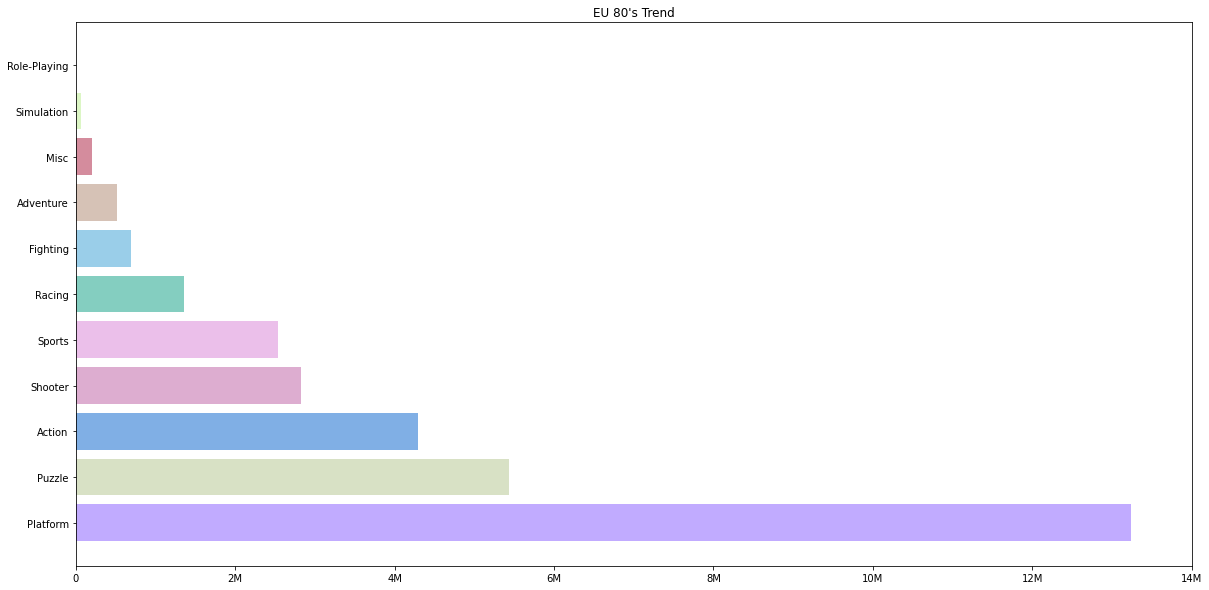

In [50]:
# 80년대 장르별 총 판매량(유럽) - 트렌드

labels = YearTren80EU['Genre']
ratio = YearTren80EU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(20,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 2000000 , 4000000 , 6000000 , 8000000 , 10000000 , 12000000 , 14000000], ('0' , '2M' , '4M' , '6M'  , '8M' , '10M' , '12M' , '14M'))
plt.title("EU 80's Trend");

plt.show()

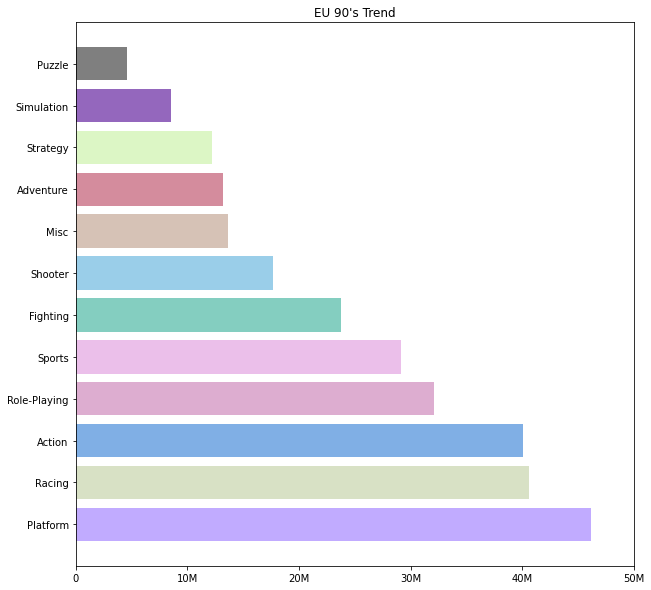

In [51]:
# 90년대 장르별 총 판매량(유럽) - 트렌드

labels = YearTren90EU['Genre']
ratio = YearTren90EU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000], ('0' , '10M' , '20M' , '30M'  , '40M' , '50M'))
plt.title("EU 90's Trend");

plt.show()

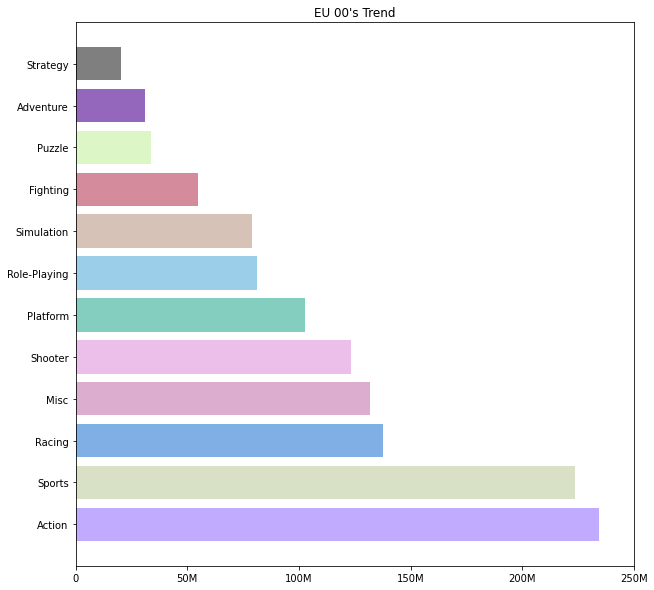

In [52]:
# 00년대 장르별 총 판매량(유럽) - 트렌드

labels = YearTren00EU['Genre']
ratio = YearTren00EU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000], ('0' , '50M' , '100M' , '150M'  , '200M' , '250M'))
plt.title("EU 00's Trend");
plt.show()

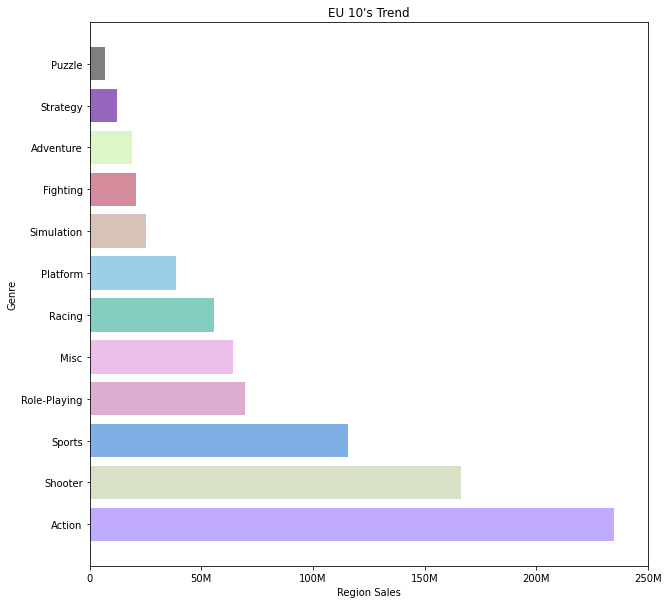

In [53]:
# 10년대 장르별 총 판매량(유럽) - 트렌드

labels = YearTren10EU['Genre']
ratio = YearTren10EU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000], ('0' , '50M' , '100M' , '150M'  , '200M' , '250M'))
plt.xlabel("Region Sales");
plt.ylabel("Genre");
plt.title("EU 10's Trend");
plt.show()

In [54]:
YearTren80JP = trenJP.query("(Year >= 1980) and (Year < 1990)").reset_index(drop=True)
YearTren90JP = trenJP.query("(Year >= 1990) and (Year < 2000)").reset_index(drop=True)
YearTren00JP = trenJP.query("(Year >= 2000) and (Year < 2010)").reset_index(drop=True)
YearTren10JP = trenJP.query("(Year >= 2010) and (Year < 2021)").reset_index(drop=True)

YearTren80JP = YearTren80JP.groupby('Genre')['Region_Sales'].sum()
YearTren80JP = pd.DataFrame(YearTren80JP)
YearTren80JP['Rank'] =  YearTren80JP['Region_Sales'].rank(method='max', ascending=False)
YearTren80JP = YearTren80JP.sort_values('Rank').reset_index(drop=False)

YearTren90JP = YearTren90JP.groupby('Genre')['Region_Sales'].sum()
YearTren90JP = pd.DataFrame(YearTren90JP)
YearTren90JP['Rank'] =  YearTren90JP['Region_Sales'].rank(method='max', ascending=False)
YearTren90JP = YearTren90JP.sort_values('Rank').reset_index(drop=False)

YearTren00JP = YearTren00JP.groupby('Genre')['Region_Sales'].sum()
YearTren00JP = pd.DataFrame(YearTren00JP)
YearTren00JP['Rank'] =  YearTren00JP['Region_Sales'].rank(method='max', ascending=False)
YearTren00JP = YearTren00JP.sort_values('Rank').reset_index(drop=False)

YearTren10JP = YearTren10JP.groupby('Genre')['Region_Sales'].sum()
YearTren10JP = pd.DataFrame(YearTren10JP)
YearTren10JP['Rank'] =  YearTren10JP['Region_Sales'].rank(method='max', ascending=False)
YearTren10JP = YearTren10JP.sort_values('Rank').reset_index(drop=False)

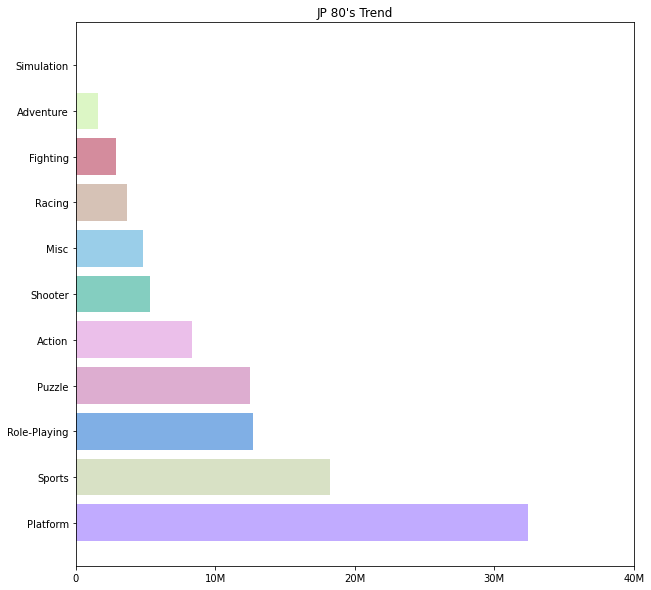

In [55]:
# 80년대 장르별 총 판매량(일본) - 트렌드

labels = YearTren80JP['Genre']
ratio = YearTren80JP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 10000000 , 20000000 , 30000000 , 40000000], ('0' , '10M' , '20M' , '30M' , '40M'))
plt.title("JP 80's Trend");
plt.show()

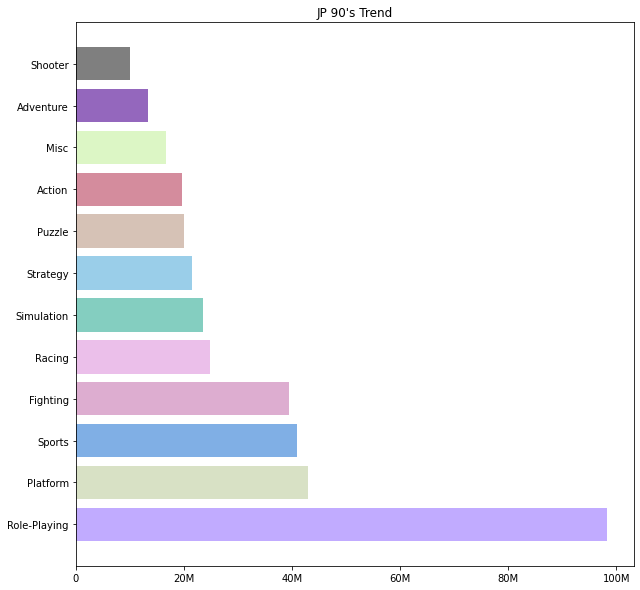

In [56]:
# 90년대 장르별 총 판매량(일본) - 트렌드

labels = YearTren90JP['Genre']
ratio = YearTren90JP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000], ('0' , '20M' , '40M' , '60M' , '80M' , '100M'))
plt.title("JP 90's Trend");
plt.show()

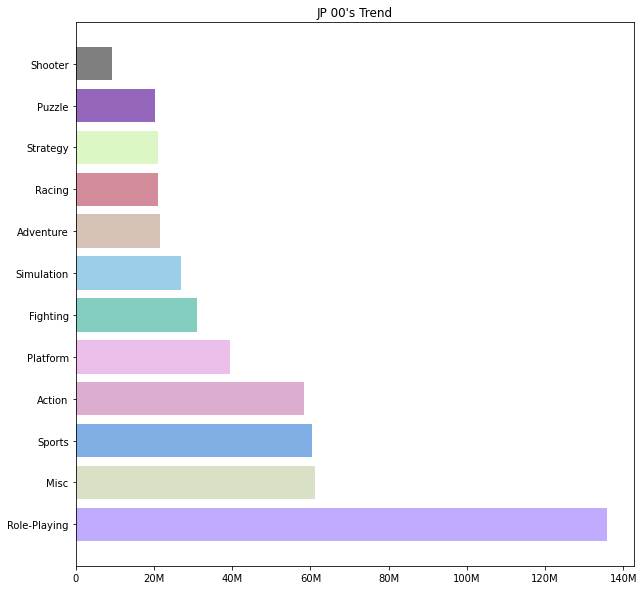

In [57]:
# 00년대 장르별 총 판매량(일본) - 트렌드

labels = YearTren00JP['Genre']
ratio = YearTren00JP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000 , 120000000 , 140000000], ('0' , '20M' , '40M' , '60M' , '80M' , '100M' , '120M' , '140M'))
plt.title("JP 00's Trend");
plt.show()

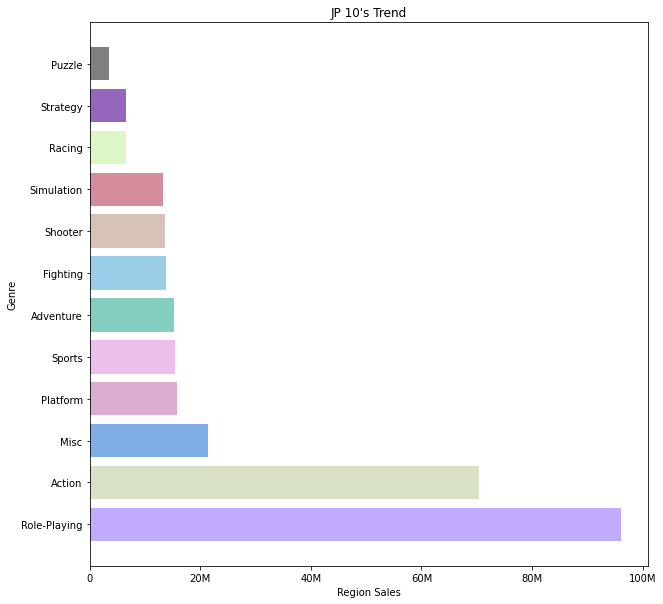

In [58]:
# 10년대 장르별 총 판매량(일본) - 트렌드

labels = YearTren10JP['Genre']
ratio = YearTren10JP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.barh(labels, ratio, color=colors)
plt.xticks([0 , 20000000 , 40000000 , 60000000 , 80000000 , 100000000], ('0' , '20M' , '40M' , '60M' , '80M' , '100M'))
plt.xlabel("Region Sales");
plt.ylabel("Genre");
plt.title("JP 10's Trend");
plt.show()

In [59]:
# 인기가 많은 게임을 분석

df_popu = df_clean.copy()

In [60]:
df_popu['Rank'] =  df_popu['Total_Sales'].rank(method='max', ascending=False)
df_popu = df_popu.sort_values('Rank').reset_index(drop=True)

In [61]:
df_popuTOT10 = df_popu.query("(Rank >= 1) and (Rank < 11)").reset_index(drop=True)

In [62]:
df_popuTOT10 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,2.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,3.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,4.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,5.0
5,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,6.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,7.0
7,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,8.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,9.0
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000,10.0


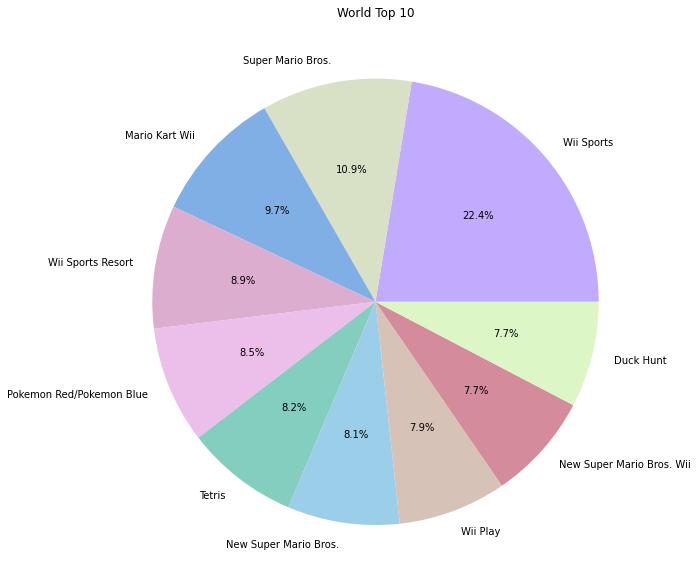

In [63]:
# Total Sales Top 10 (PIE)

labels = df_popuTOT10['Name']
ratio = df_popuTOT10['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']

plt.figure(figsize=(10,20))
plt.pie(ratio , labels = labels, autopct = '%1.1f%%', colors = colors)
plt.title('World Top 10');

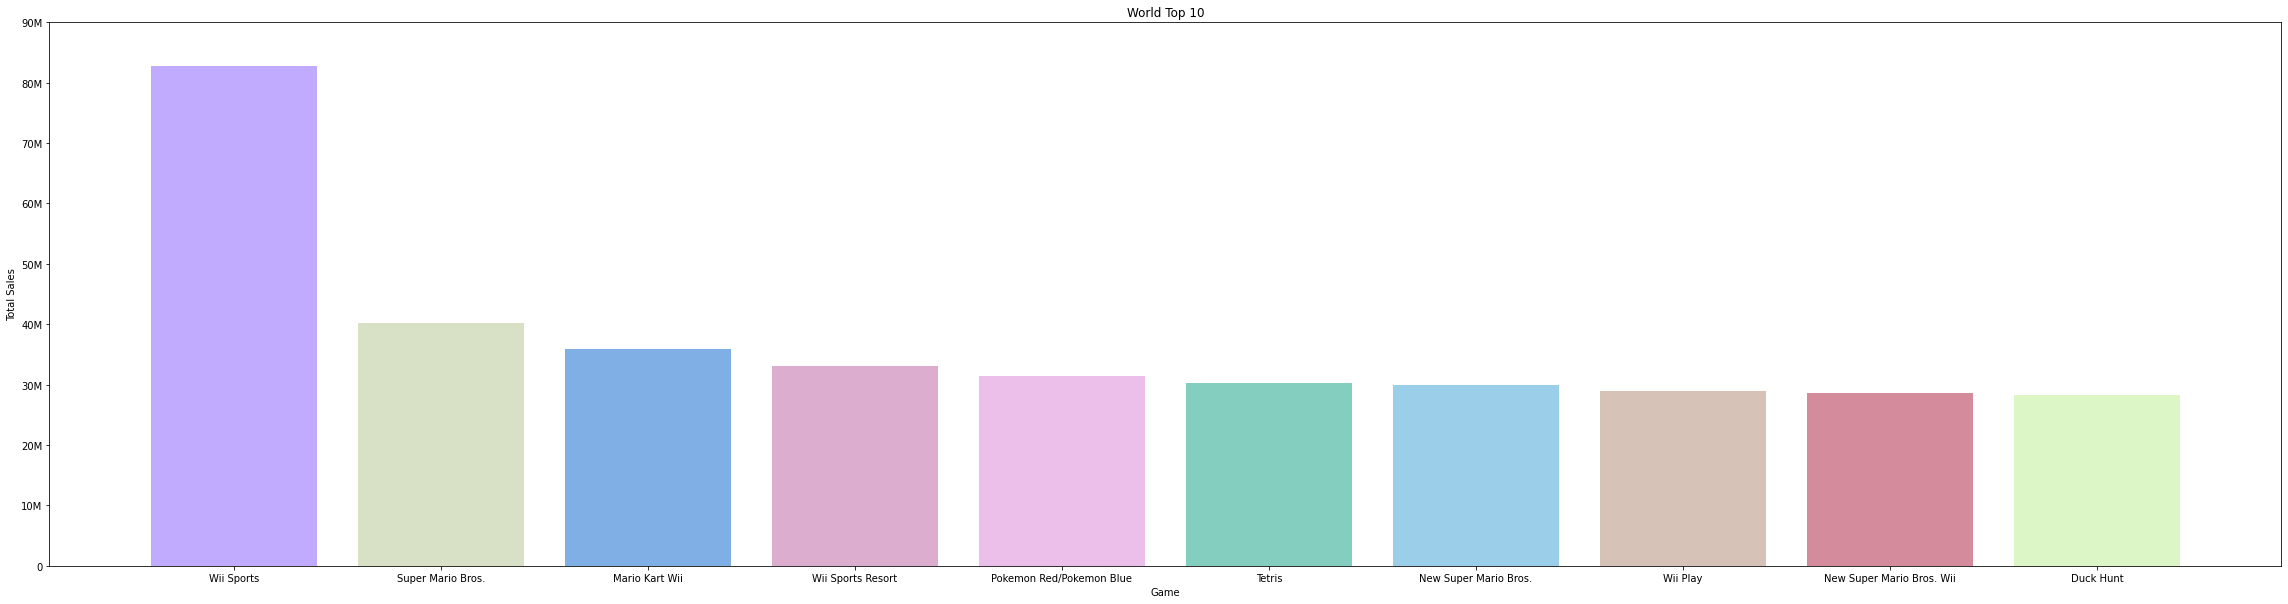

In [64]:
# Total Sales Top 10 (BAR)

labels = df_popuTOT10['Name']
ratio = df_popuTOT10['Total_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']

plt.figure(figsize=(40,10))
plt.bar(labels, ratio, color=colors)
plt.title("World Top 10");
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000 , 60000000 , 70000000 , 80000000 , 90000000], ('0' , '10M' , '20M' , '30M'  , '40M' , '50M' , '60M' , '70M' , '80M' , '90M'))
plt.show()

In [65]:
df_re = df_clean.copy()

In [66]:
df_re = pd.melt(df_re, id_vars=['Name', 'Platform', 'Year', 'Genre', 'Publisher' ,'Total_Sales'] ,value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Region_Sales')
df_re = df_re.sort_values(['Name','Region']).reset_index(drop=True)
df_re;

In [67]:
RepopNA = df_re[(df_melt['Region'] == 'NA_Sales')].sort_values('Name').reset_index(drop=True)
RegpopEU = df_re[(df_melt['Region'] == 'EU_Sales')].sort_values('Name').reset_index(drop=True)
RegpopJP = df_re[(df_melt['Region'] == 'JP_Sales')].sort_values('Name').reset_index(drop=True)
RegpopOther = df_re[(df_melt['Region'] == 'Other_Sales')].reset_index(drop=True).sort_values('Name').reset_index(drop=True)

RepopNA['Rank'] =  RepopNA['Region_Sales'].rank(method='max', ascending=False)
RepopNA = RepopNA.sort_values('Rank').reset_index(drop=True)
RepopNA = RepopNA.query("(Rank >= 1) and (Rank < 11)").reset_index(drop=True)

RegpopEU['Rank'] =  RegpopEU['Region_Sales'].rank(method='max', ascending=False)
RegpopEU = RegpopEU.sort_values('Rank').reset_index(drop=True)
RegpopEU = RegpopEU.query("(Rank >= 1) and (Rank < 11)").reset_index(drop=True)

RegpopJP['Rank'] =  RegpopJP['Region_Sales'].rank(method='max', ascending=False)
RegpopJP = RegpopJP.sort_values('Rank').reset_index(drop=True)
RegpopJP = RegpopJP.query("(Rank >= 1) and (Rank < 11)").reset_index(drop=True)

RegpopOther['Rank'] =  RegpopOther['Region_Sales'].rank(method='max', ascending=False)
RegpopOther = RegpopOther.sort_values('Rank').reset_index(drop=True)
RegpopOther = RegpopOther.query("(Rank >= 1) and (Rank < 11)").reset_index(drop=True)

In [68]:
RepopNA

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,82740000,NA_Sales,41490000,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40240000,NA_Sales,29080000,2.0
2,Duck Hunt,NES,1984,Shooter,Nintendo,28310000,NA_Sales,26930000,3.0
3,Tetris,GB,1989,Puzzle,Nintendo,30260000,NA_Sales,23200000,4.0
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830000,NA_Sales,15850000,5.0
5,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000000,NA_Sales,15750000,6.0
6,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,21820000,NA_Sales,14970000,7.0
7,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28610000,NA_Sales,14590000,8.0
8,Wii Play,Wii,2006,Misc,Nintendo,29010000,NA_Sales,14030000,9.0
9,Super Mario World,SNES,1990,Platform,Nintendo,20620000,NA_Sales,12780000,10.0


In [69]:
RegpopEU

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,82740000,EU_Sales,29020000,1.0
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830000,EU_Sales,12880000,2.0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000000,EU_Sales,11010000,3.0
3,Nintendogs,DS,2005,Simulation,Nintendo,24750000,EU_Sales,11000000,4.0
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21389999,EU_Sales,9270000,5.0
5,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,20219999,EU_Sales,9260000,6.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010000,EU_Sales,9230000,7.0
7,Wii Play,Wii,2006,Misc,Nintendo,29010000,EU_Sales,9200000,8.0
8,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380000,EU_Sales,8890000,9.0
9,Wii Fit Plus,Wii,2009,Sports,Nintendo,22000000,EU_Sales,8590000,10.0


In [70]:
RegpopJP

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales,Rank
0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380000,JP_Sales,10220000,1.0
1,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,23090000,JP_Sales,7200000,2.0
2,Super Mario Bros.,NES,1985,Platform,Nintendo,40240000,JP_Sales,6810000,3.0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010000,JP_Sales,6500000,4.0
4,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,18350000,JP_Sales,6040000,5.0
5,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,15320000,JP_Sales,5650000,6.0
6,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,15840000,JP_Sales,5380000,7.0
7,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,12280000,JP_Sales,5330000,8.0
8,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,15300000,JP_Sales,5320000,9.0
9,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4870000,JP_Sales,4870000,10.0


In [71]:
RegpopOther

,Name,Platform,Year,Genre,Publisher,Total_Sales,Region,Region_Sales,Rank
0,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,20810000,Other_Sales,10570000,1.0
1,Wii Sports,Wii,2006,Sports,Nintendo,82740000,Other_Sales,8460000,2.0
2,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,11650000,Other_Sales,7530000,3.0
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21389999,Other_Sales,4139999,4.0
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830000,Other_Sales,3310000,5.0
5,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000000,Other_Sales,2960000,6.0
6,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,3620000,Other_Sales,2930000,7.0
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010000,Other_Sales,2900000,8.0
8,Wii Play,Wii,2006,Misc,Nintendo,29010000,Other_Sales,2850000,9.0
9,Nintendogs,DS,2005,Simulation,Nintendo,24750000,Other_Sales,2750000,10.0


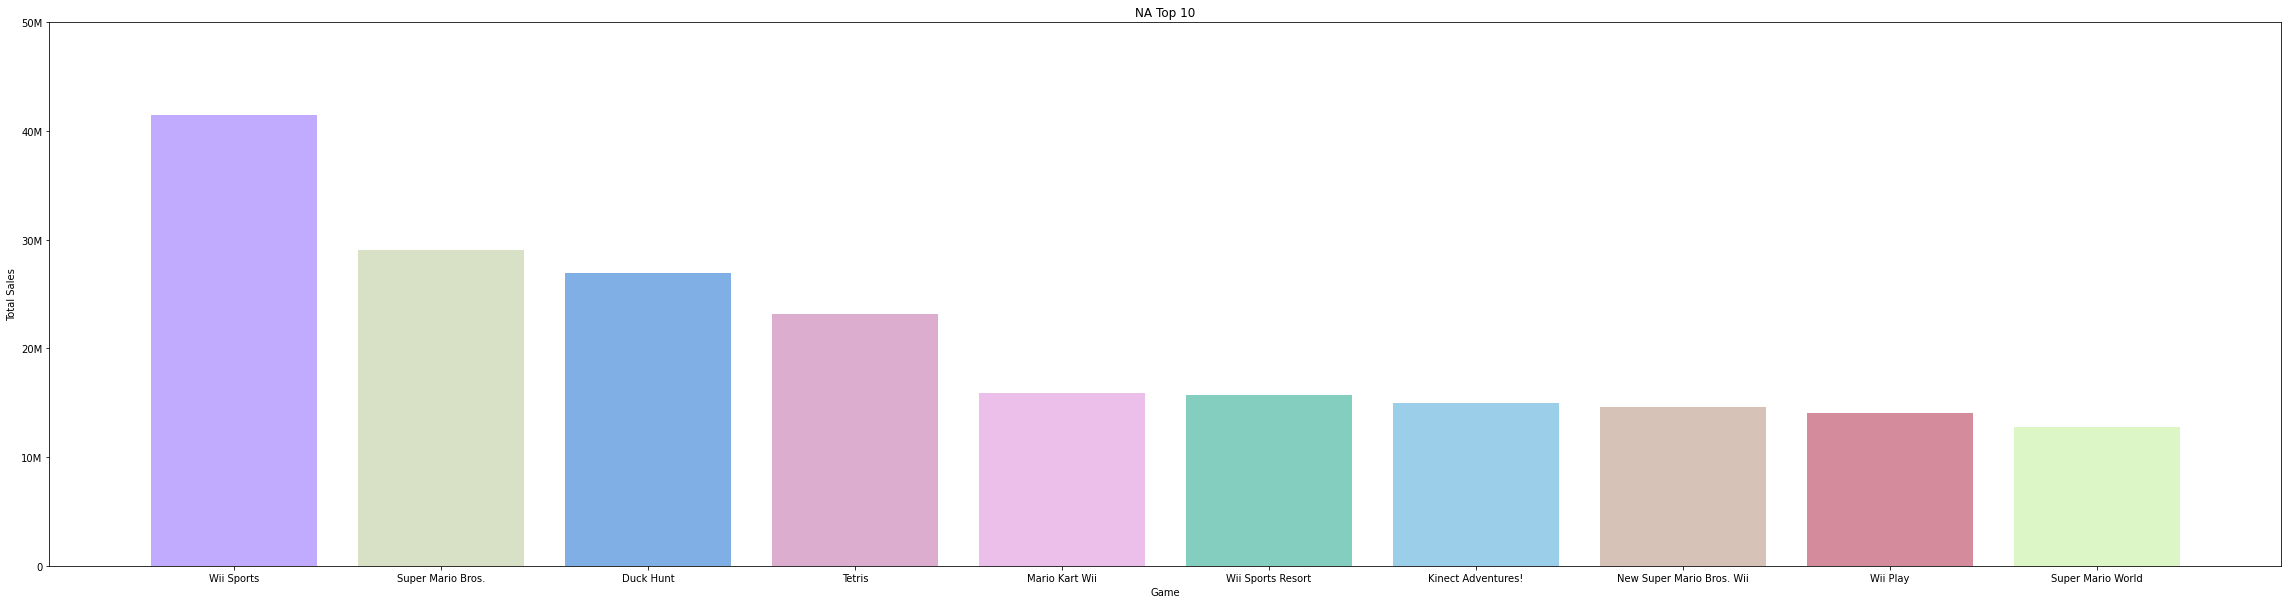

In [72]:
# Total Sales Top 10 (NA)

labels = RepopNA['Name']
ratio = RepopNA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']

plt.figure(figsize=(40,10))
plt.bar(labels, ratio, color=colors)
plt.title("NA Top 10");
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000], ('0' , '10M' , '20M' , '30M'  , '40M' , '50M'))
plt.show()

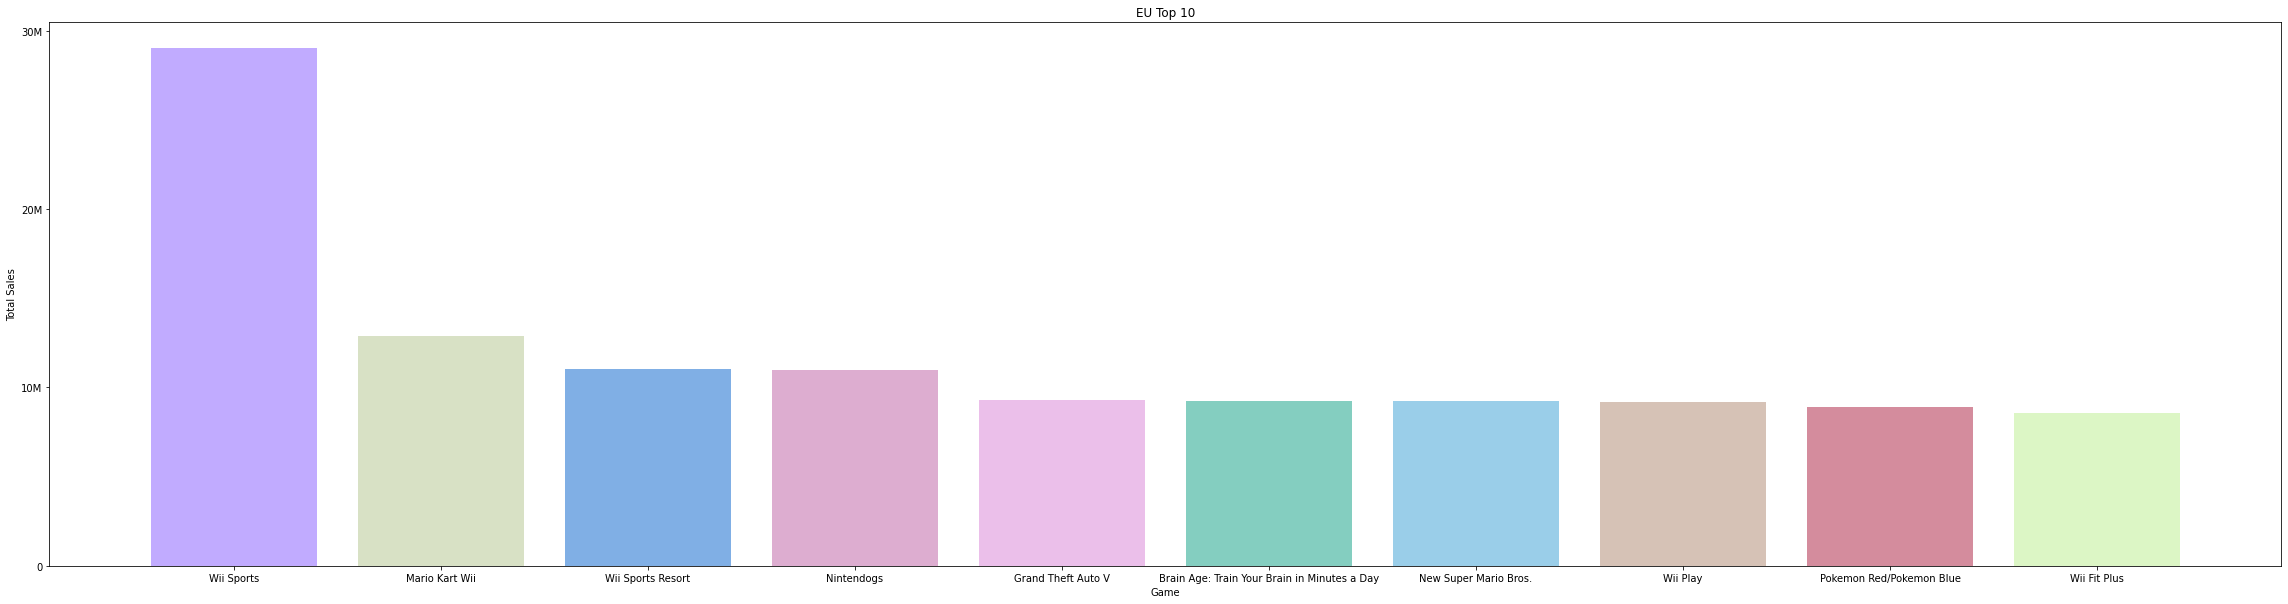

In [73]:
# Total Sales Top 10 (EU)

labels = RegpopEU['Name']
ratio = RegpopEU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']

plt.figure(figsize=(40,10))
plt.bar(labels, ratio, color=colors)
plt.title("EU Top 10");
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 10000000 , 20000000 , 30000000], ('0' , '10M' , '20M' , '30M'))
plt.show()

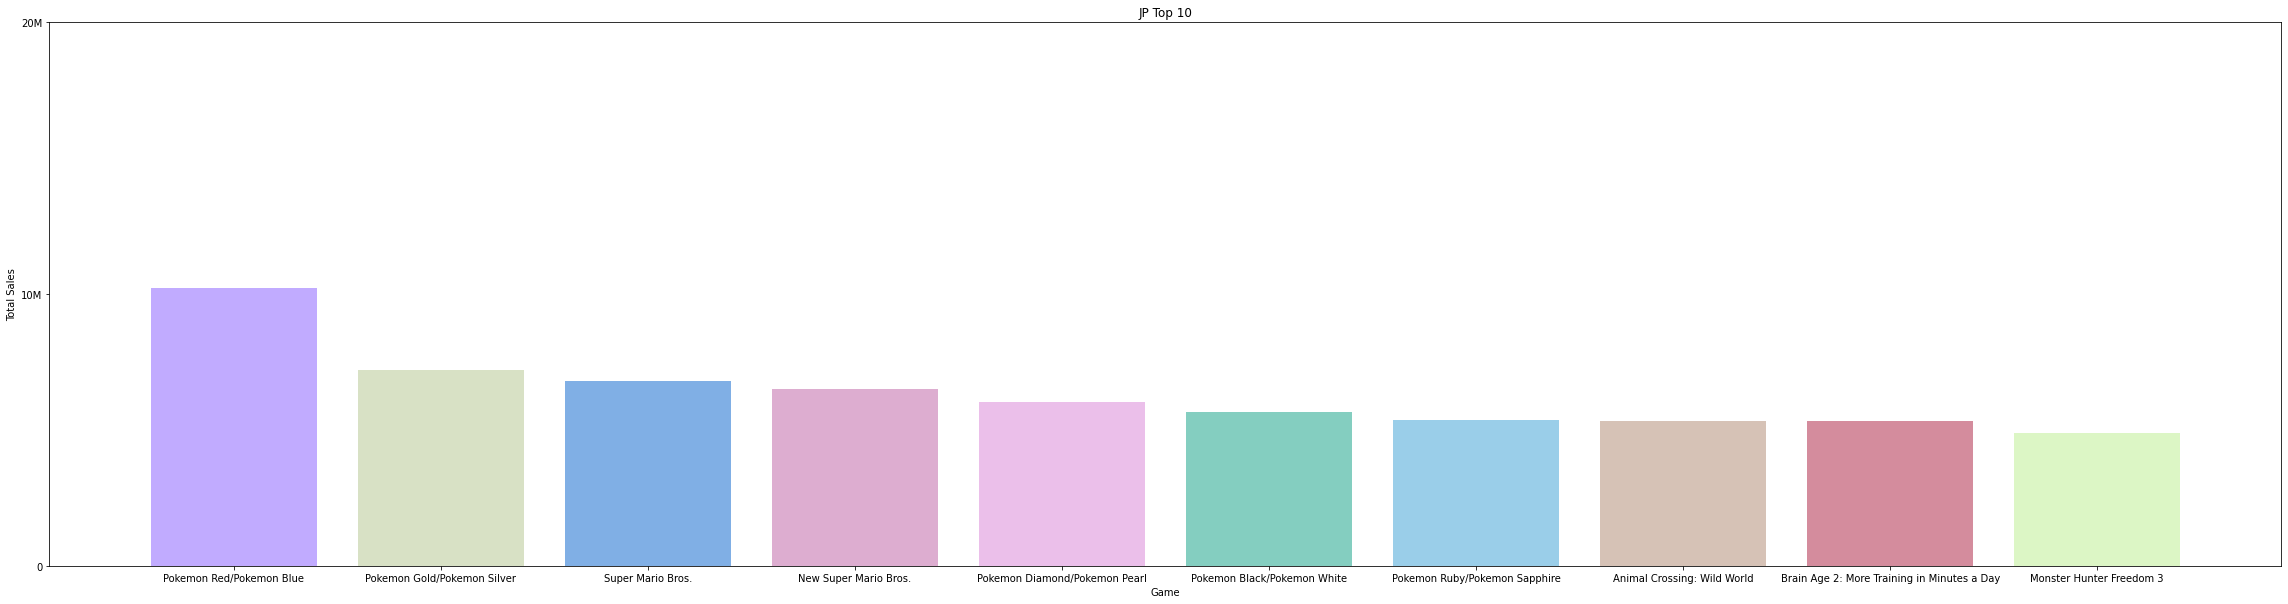

In [74]:
# Total Sales Top 10 (JP)

labels = RegpopJP['Name']
ratio = RegpopJP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']

plt.figure(figsize=(40,10))
plt.bar(labels, ratio, color=colors)
plt.title("JP Top 10");
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 10000000 , 20000000], ('0' , '10M' , '20M'))
plt.show()

In [75]:
# 연도별 플랫폼을 변화를 대략적으로 파악

df_plat = df_clean.copy()

In [76]:
# 연도별 플랫폼을 변화를 대략적으로 파악
# 판매량이 10M 이상인 것만 산출

YearPlat = df_plat.groupby(['Year','Platform'])['Total_Sales'].sum().unstack().fillna(0)
YearPlat;

In [77]:
YearPlat1 = df_plat.groupby(['Year','Platform'])['Total_Sales'].sum()
YearPlat1 = pd.DataFrame(YearPlat1)
YearPlat1

Total_Sales
Year Platform             
1980 2600         10880000
1981 2600         35680000
1982 2600         28880000
1983 2600          5840000
     NES          10960000
...                    ...
2016 X360           830000
     XOne         12380000
2017 PS4             30000
     PSV             20000
2020 DS             290000

[241 rows x 1 columns]

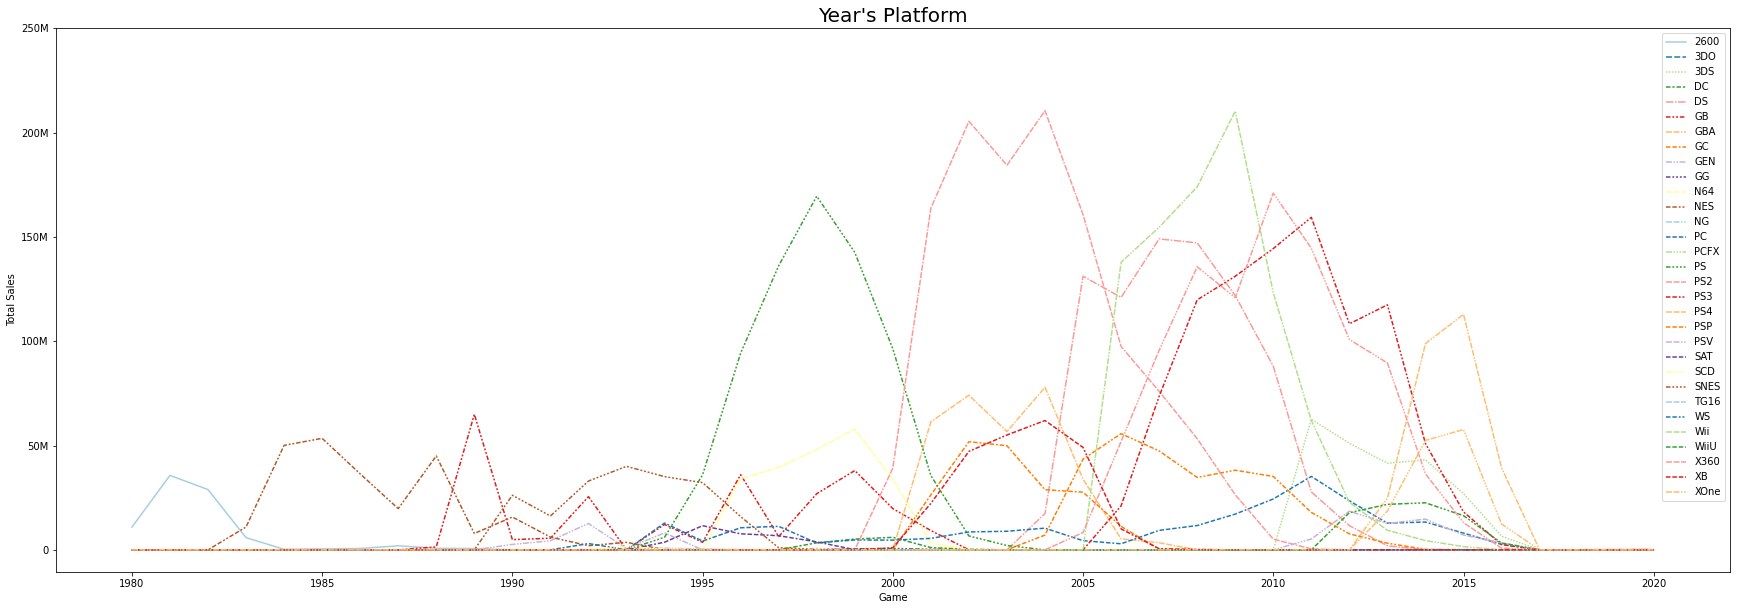

In [78]:
# 전체 플랫폼별 출고량

import seaborn as sns

fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = YearPlat, palette = 'Paired') 
plt.title("Year's Platform", fontsize = 20)
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000], ('0' , '50M' , '100M' , '150M' , '200M' , '250M'))
plt.legend(loc='upper right', fontsize = 10)
plt.show()

In [79]:
# 위의 표로도 플랫폼의 현황을 간략하게 파악할 수 있으나, 조금 더 정확하게 분석하기 위하여 시대를 4개로 나누어 파악하여 보기로 함
# 판매량이 10M 이상인 것만 산출

YearPlat80 = YearPlat1.query("(Year >= 1980) and (Year < 1989)")
YearPlat90 = YearPlat1.query("(Year >= 1990) and (Year < 2000)")
YearPlat00 = YearPlat1.query("(Year >= 2001) and (Year < 2010)")
YearPlat10 = YearPlat1.query("(Year >= 2010) and (Year < 2021)")

In [80]:
YearPlat80

Total_Sales
Year Platform             
1980 2600         10880000
1981 2600         35680000
1982 2600         28880000
1983 2600          5840000
     NES          10960000
1984 2600           270000
     NES          50080000
1985 2600           450000
     DS              20000
     NES          53440000
     PC              40000
1986 2600           670000
     NES          36409999
1987 2600          1940000
     NES          19759999
1988 2600           740000
     GB            1430000
     NES          45010000
     PC              30000

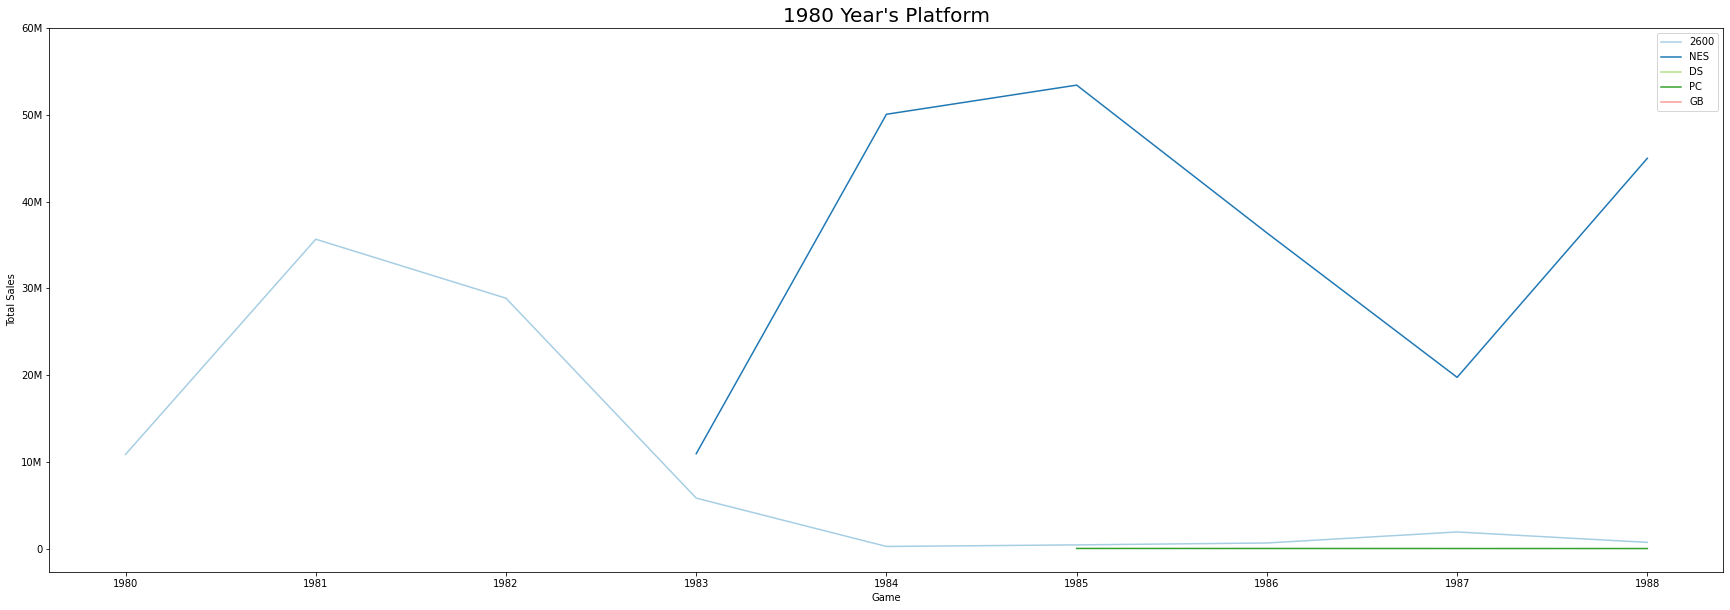

In [81]:
fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = YearPlat80 , x = 'Year' , y = 'Total_Sales' , hue = 'Platform' , palette = 'Paired') 
plt.title("1980 Year's Platform", fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000 , 60000000], ('0' , '10M' , '20M' , '30M' , '40M' , '50M' , '60M'))
plt.legend(loc='upper right', fontsize = 10)
plt.show()

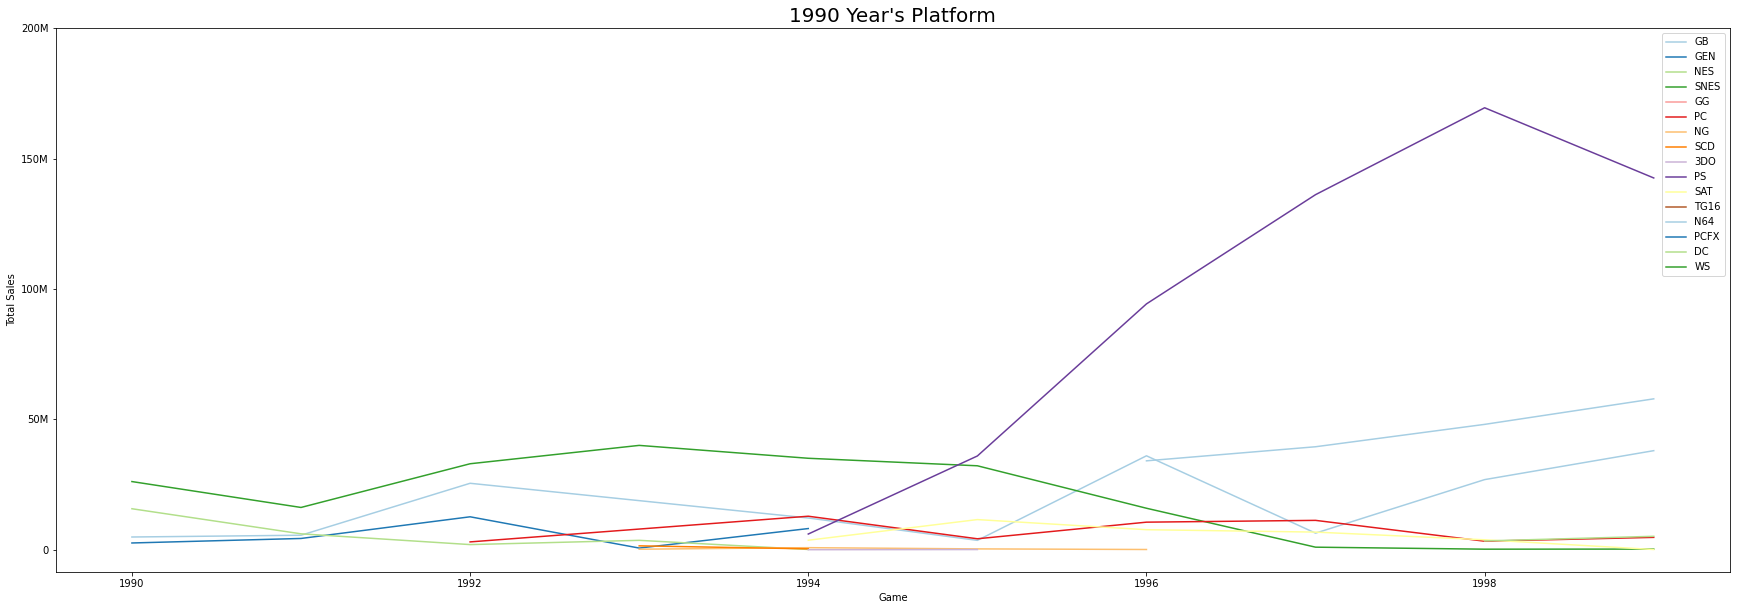

In [82]:
fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = YearPlat90, x = 'Year' , y = 'Total_Sales' , hue = 'Platform' , palette = 'Paired') 
plt.title("1990 Year's Platform", fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000], ('0' , '50M' , '100M' , '150M' , '200M'))
plt.legend(loc='upper right', fontsize = 10)
plt.show()

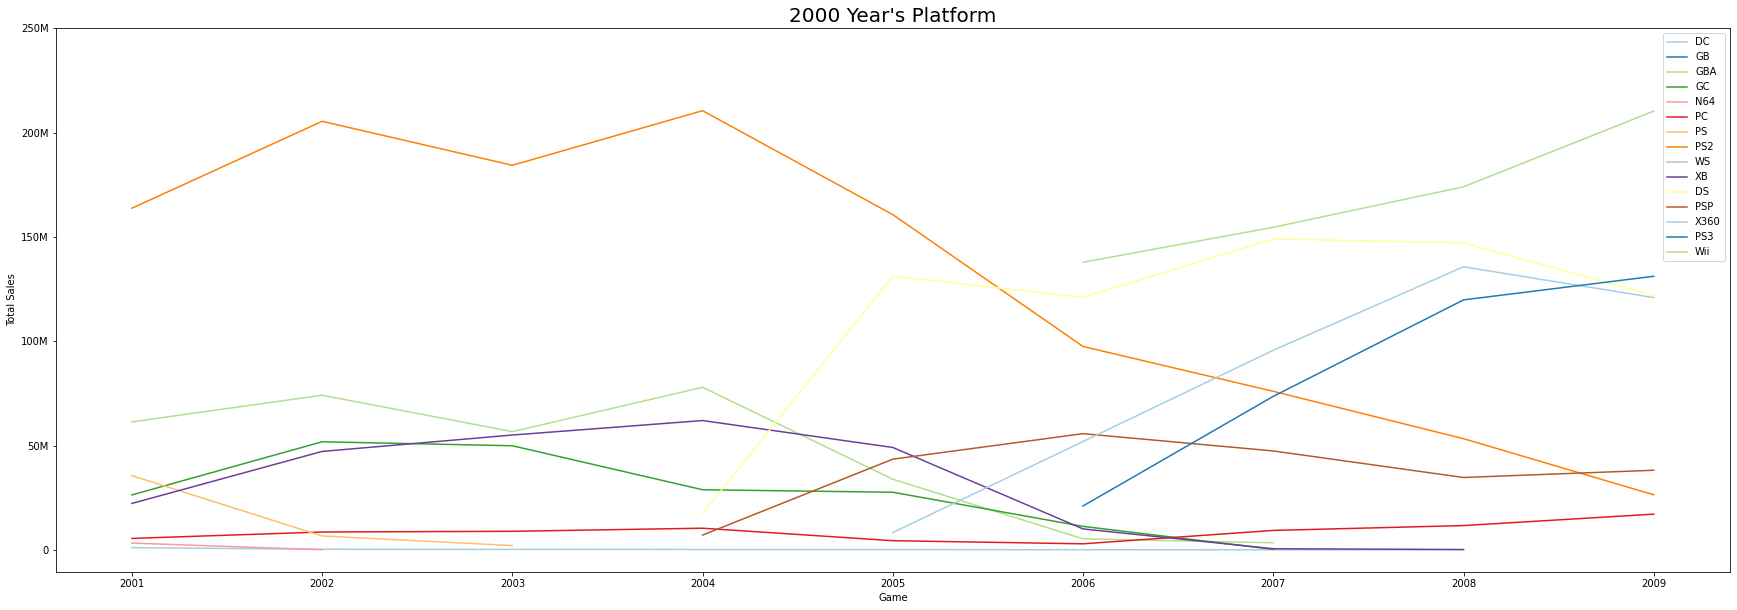

In [83]:
fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = YearPlat00 , x = 'Year' , y = 'Total_Sales' , hue = 'Platform' , palette = 'Paired') 
plt.title("2000 Year's Platform", fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000, 250000000], ('0' , '50M' , '100M' , '150M' , '200M' , '250M'))
plt.legend(loc='upper right', fontsize = 10)
plt.show()

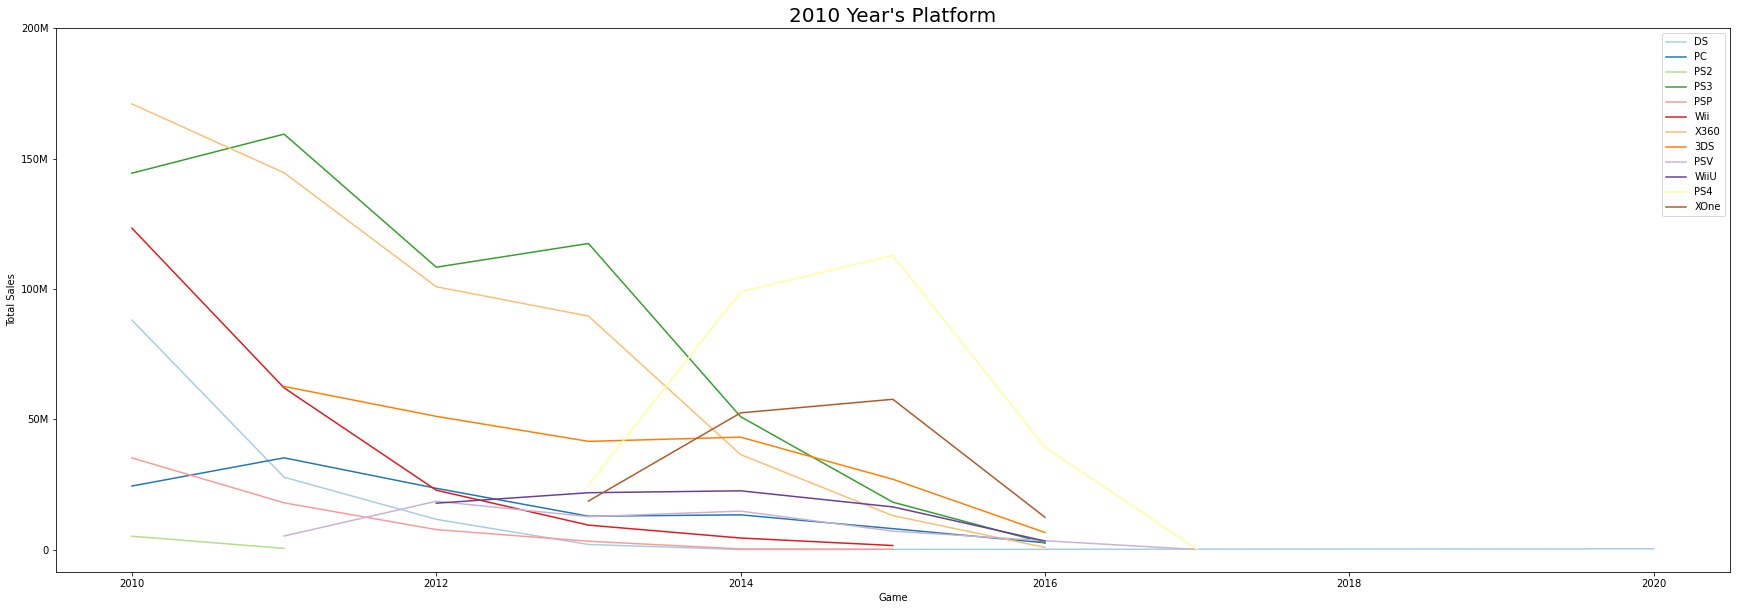

In [84]:
fig = plt.figure(figsize=(30, 10))
fig.set_facecolor('white')
sns.lineplot(data = YearPlat10, x = 'Year', y = 'Total_Sales', hue = 'Platform' , palette = 'Paired') 
plt.title("2010 Year's Platform", fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.xlabel("Game");
plt.ylabel("Total Sales");
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000], ('0' , '50M' , '100M' , '150M' , '200M'))
plt.legend(loc='upper right', fontsize = 10)
plt.show()

In [85]:
# 어떤 게임을 설계해야 할까?

# 1. 회사는 다양한 플랫폼에 적용할 능력이 충분히 되는 규모의 대기업 게임회사로 가정
# 2. 다국적 기업이므로 모든 시장을 아우를 수 있음
# 3. 게임은 지역별로 상위 2 ~ 3개 장르에 대한 3개의 플랫폼을 활용한 게임을 설계하기로 결정
# 4. 2023년 1분기에 각 지역별로 출시할 예정이므로, 2010 ~ 2020년도부터의 데이터만 사용하여 결과 도출
# 5. 상위 지역별로 2010년대 상위 3개의 선호 장르를 기준으로 플랫폼을 탐색
# 6. 위에서 사용한 df_melt를 사용(지역별로 출고량이 나누어져 있음)
# 7. 플랫폼은 버전이 나누어져 있을 경우 해당 플랫폼 전체로 가정.

In [86]:
df_des = df_melt.copy()

In [87]:
DesNA = df_des[(df_des['Region'] == 'NA_Sales')].sort_values('Name').reset_index(drop=True)
DesEU = df_des[(df_des['Region'] == 'EU_Sales')].sort_values('Name').reset_index(drop=True)
DesJP = df_des[(df_des['Region'] == 'JP_Sales')].sort_values('Name').reset_index(drop=True)
DesOther = df_des[(df_des['Region'] == 'Other_Sales')].reset_index(drop=True).sort_values('Name').reset_index(drop=True)

In [88]:
# 북미지역의 2010년대 선호 장르는 액션, 슈팅, 스포츠이므로 해당 장르를 기준으로 함

DesNA = DesNA[(DesNA['Year'] >= 2010)]
DesNA = DesNA[(DesNA['Genre'] == 'Action') | (DesNA['Genre'] == 'Shooter') | (DesNA['Genre'] == 'Sports') ]
DesNA = DesNA.groupby('Platform')['Region_Sales'].sum()
DesNA = pd.DataFrame(DesNA)

DesNA['Rank'] =  DesNA['Region_Sales'].rank(method='max', ascending=False)
DesNA = DesNA.sort_values('Rank').reset_index(drop=False)
DesNA

,Platform,Region_Sales,Rank
0,X360,232599999,1.0
1,PS3,162990000,2.0
2,PS4,74950000,3.0
3,XOne,65489999,4.0
4,Wii,50660000,5.0
5,3DS,21589999,6.0
6,DS,16210000,7.0
7,PC,14950000,8.0
8,WiiU,13870000,9.0
9,PSV,8100000,10.0


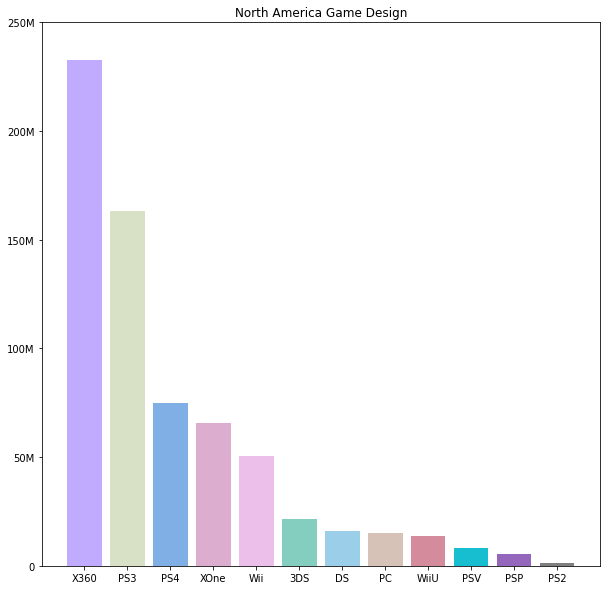

In [89]:
# 북미지역의 2010년도 선호 장르는 액션, 슈팅, 스포츠이므로 해당 장르를 기준으로 함
# 상위 플랫폼을 순위를 매기어 확인해 본 결과,  X 시리즈와 PS, Wii 시리즈가 가장 두각을 드러냄
# 북미 지역을 목표한 게임은 액션, 슈팅, 스포츠 장르가 X 시리즈 / PS 시리즈 / Wii 시리즈가 적용될 수 있는 게임으로 설계

labels = DesNA['Platform']
ratio = DesNA['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#17becf' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000 , 250000000], ('0' , '50M' , '100M' , '150M'  , '200M' , '250M'))
plt.title("North America Game Design");
plt.show()

In [90]:
# 유럽지역의 2010년대 선호 장르는 액션, 슈팅, 스포츠이므로 해당 장르를 기준으로 함

DesEU = DesEU[(DesEU['Year'] >= 2010)]
DesEU = DesEU[(DesEU['Genre'] == 'Action') | (DesEU['Genre'] == 'Shooter') | (DesEU['Genre'] == 'Sports') ]
DesEU = DesEU.groupby('Platform')['Region_Sales'].sum()
DesEU = pd.DataFrame(DesEU)

DesEU['Rank'] =  DesEU['Region_Sales'].rank(method='max', ascending=False)
DesEU = DesEU.sort_values('Rank').reset_index(drop=False)
DesEU

,Platform,Region_Sales,Rank
0,PS3,161850000,1.0
1,X360,122260000,2.0
2,PS4,93459998,3.0
3,XOne,34409998,4.0
4,PC,30680000,5.0
5,Wii,26940000,6.0
6,3DS,14840000,7.0
7,WiiU,9240000,8.0
8,PSV,9160000,9.0
9,DS,7640000,10.0


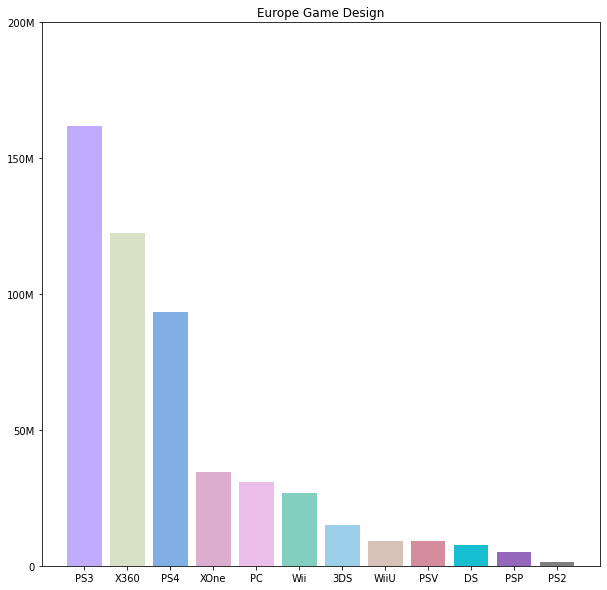

In [91]:
# 유럽지역의 2010년도 선호 장르 역시 액션, 슈팅, 스포츠이므로 해당 장르를 기준으로 함
# 상위 플랫폼을 순위를 매기어 확인해 본 결과 PS 시리즈가 가장 두각을 드러냈으며  X 시리즈가 그 다음을 차지하였고, Wii 시리즈와 PC 역시 높은 수준을 차지함
# 유럽지역을 겨냥한 게임 역시 장르와 플랫폼 역시 북미 지역과 크게 차이가 없어 설계 할 때에 매우 편할 것이며, 추가적으로 PC 부분에서도 즐길 수 있는 게임이 된다면 좋은 결과를 얻을 것.

labels = DesEU['Platform']
ratio = DesEU['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#17becf' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 50000000 , 100000000 , 150000000 , 200000000], ('0' , '50M' , '100M' , '150M'  , '200M'))
plt.title("Europe Game Design");
plt.show()

In [92]:
# 일본지역의 2010년대 선호 장르는 롤플레잉, 액션(기타는 제외)이므로 해당 장르를 기준으로 함

DesJP = DesJP[(DesJP['Year'] >= 2010)]
DesJP = DesJP[(DesJP['Genre'] == 'Role-Playing') | (DesJP['Genre'] == 'Action')]
DesJP = DesJP.groupby('Platform')['Region_Sales'].sum()
DesJP = pd.DataFrame(DesJP)

DesJP['Rank'] =  DesJP['Region_Sales'].rank(method='max', ascending=False)
DesJP = DesJP.sort_values('Rank').reset_index(drop=False)
DesJP

,Platform,Region_Sales,Rank
0,3DS,57290000,1.0
1,PS3,34210000,2.0
2,PSP,24650000,3.0
3,DS,19080000,4.0
4,PSV,14010000,5.0
5,PS4,8380000,6.0
6,Wii,4550000,7.0
7,X360,2250000,8.0
8,WiiU,1900000,9.0
9,PS2,110000,10.0


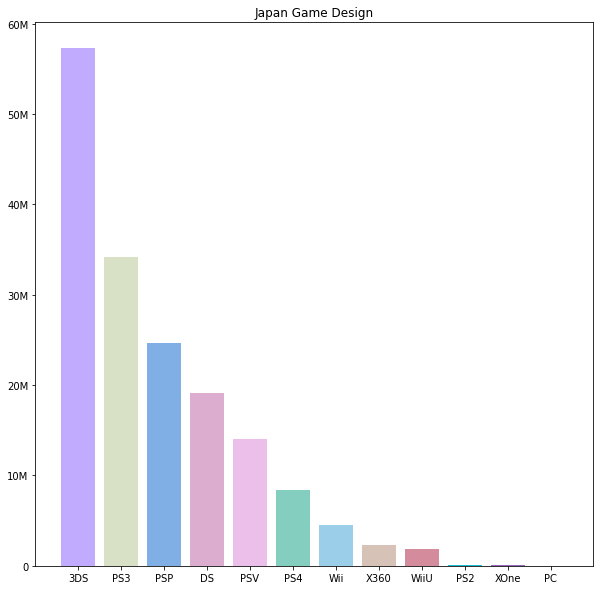

In [93]:
# 일본지역의 2010년도 선호 장르는 롤플레잉, 액션이므로 해당 장르를 기준으로 함
# 상위 플랫폼을 순위를 매기어 확인해 본 결과 앞의 북미와 유럽 지역과 큰 차이가 있었는데, DS와 PS 분야에서 많은 매출을 차지하였고, PC와 X 시리즈는 매우 부진하였음
# 일본지역의 게임은 롤플레잉, 액션 장르가 DS와 PS 시리즈가 적용될 수 있는 게임이 설계되어야 함

labels = DesJP['Platform']
ratio = DesJP['Region_Sales']
colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea', '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#17becf' , '#9467bd', '#7f7f7f']

plt.figure(figsize=(10,10))
plt.bar(labels, ratio, color=colors)
plt.yticks([0 , 10000000 , 20000000 , 30000000 , 40000000 , 50000000 , 60000000], ('0' , '10M' , '20M' , '30M'  , '40M' , '50M' , '60M'))
plt.title("Japan Game Design");
plt.show()